# EN3150 Assignment 01
#### Muftee M. M. M.      |     220399B

## Learning from data and related challanges and linear models for regression

### 1. Linear Regression impact on outliers

Regression Line: y = -3.56x + 3.92


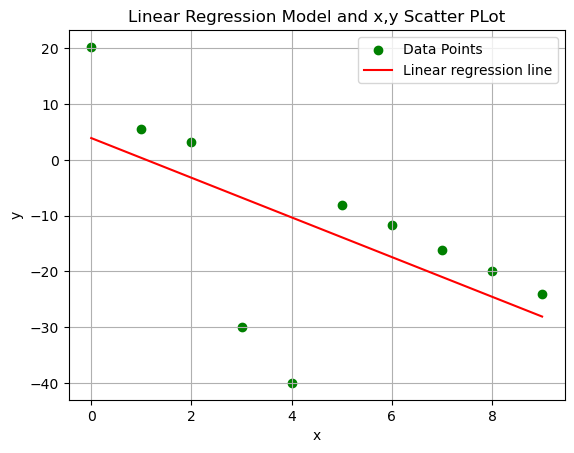

In [9]:
# Step 01: Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Step 02: Define the Data
x_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y_i = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Step 03: Train a Linear Regression Model
model = LinearRegression()
model.fit(x_i, y_i)
y_pred = model.predict(x_i)

# Step 04: Print the regression line equation
print(f"Regression Line: y = {model.coef_[0]: .2f}x + {model.intercept_:.2f}")

#Step 05: Plot the data and regression line
plt.scatter(x_i, y_i, color= 'green', label = 'Data Points')
plt.plot(x_i, y_pred, color = 'red', label = 'Linear regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Model and x,y Scatter PLot')
plt.legend()
plt.grid('True')
plt.show()

### Introducing a Robust Estimator

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the Data
x_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y_i = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Define Models
def model1(x): return -4 * x + 12
def model2(x): return -3.55 * x + 3.91

# Predictions for each model
y_pred1 = model1(x_i)
y_pred2 = model2(x_i)

# Define the Robust Loss Function
def robust_loss(y_i, y_pred, beta):
  residual_squared = (y_i - y_pred) ** 2
  loss = residual_squared / (residual_squared + beta ** 2)
  return np.mean(loss)

# Define Beta values
betas = [1, 1e-6, 1e3]

# Calculate and print loss
print("Beta\t\t Loss(Model 01)\t\t Loss(Model 02)")
for beta in betas:
  loss1 = robust_loss(y_i, y_pred1, beta)
  loss2 = robust_loss(y_i, y_pred2, beta)
  print(f"{beta:.0e}\t\t{loss1:.6f}\t\t{loss2:.6f}")

Beta		 Loss(Model 01)		 Loss(Model 02)
1e+00		0.929811		0.949055
1e-06		1.000000		1.000000
1e+03		0.000461		0.000396


TASK 4: Loss Function Calculation
β		Loss(Model 1)		Loss(Model 2)
--------------------------------------------------
1e+00		0.435416		0.972847
1e-06		1.000000		1.000000
1e+03		0.000227		0.000188

TASK 5: Analysis of Suitable β Value
Data Analysis:
Data points: 10
Model 1 residuals: [8.26e+00 2.39e+00 8.60e-01 3.00e+01 3.60e+01 1.30e-01 2.70e-01 8.00e-02
 5.00e-02 3.00e-02]
Model 2 residuals: [16.35  5.25  6.33 23.26 29.71  5.71  5.66  4.86  4.54  4.01]
Max residual Model 1: 36.00
Max residual Model 2: 29.71


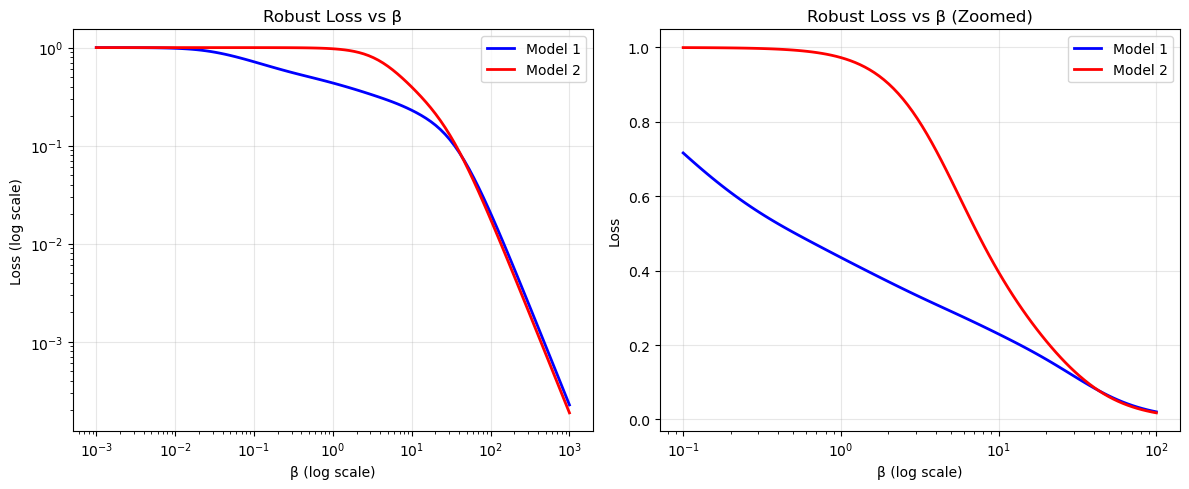


Suitable β value analysis:
• β = 1e-6 (very small): Loss ≈ 1.0 for both models
  This behaves like standard MSE, sensitive to outliers
• β = 1: Moderate robustness, balanced approach
• β = 1e3 (very large): Loss ≈ 0 for both models
  This treats all errors equally, losing sensitivity

Recommended β ≈ 1-10: Provides good balance between robustness and sensitivity

TASK 6: Model Selection with Robust Estimator
Using β = 1:
Model 1 loss: 0.435416
Model 2 loss: 0.972847

Selected Model: Model 1
Model 1 has lower robust loss (0.435416 vs 0.972847)


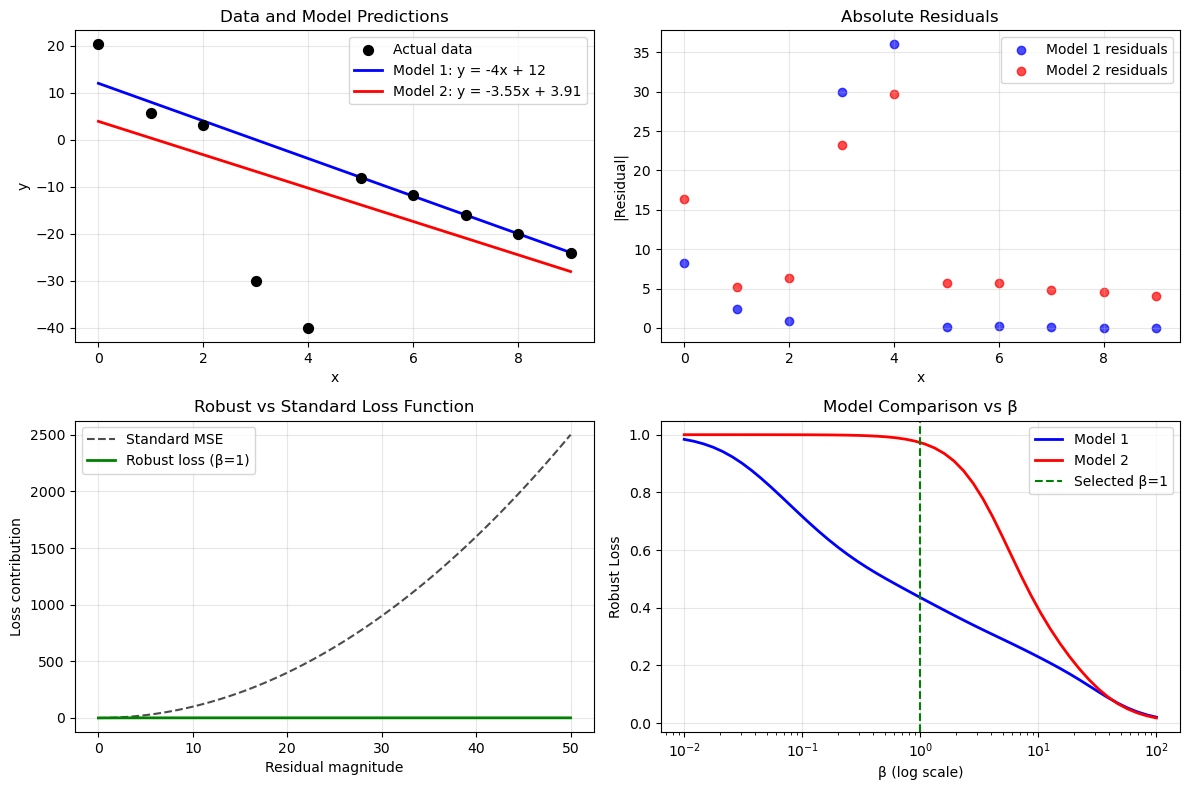


TASK 7: How Robust Estimator Reduces Impact of Outliers
The robust estimator reduces outlier impact through several mechanisms:

1. BOUNDED LOSS CONTRIBUTION:
   • Standard MSE: Loss grows as residual²
   • Robust loss: Loss approaches 1 as residual → ∞
   • Large outliers contribute at most 1 to the average loss

2. MATHEMATICAL ANALYSIS:
   Residual	Standard MSE	Robust Loss
   1		1.0		0.500
   2		4.0		0.800
   5		25.0		0.962
   10		100.0		0.990
   50		2500.0		1.000

3. OUTLIER IDENTIFICATION:
   Data points with large residuals (>10): [3 4]
   These correspond to y values: [-30. -40.]

TASK 8: Alternative Loss Functions for Robust Estimation
Other robust loss functions include:

1. HUBER LOSS:
   L(r) = { ½r²           if |r| ≤ δ
          { δ|r| - ½δ²    if |r| > δ
   • Quadratic for small residuals, linear for large ones

2. CAUCHY LOSS:
   L(r) = ½ log(1 + (r/σ)²)
   • Even more robust than the given loss function

3. TUKEY'S BIWEIGHT:
   L(r) = { (c²/6)[1-(1-(r/c)²)³]  if |r| ≤ 

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the Data
x_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y_i = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Define Models
def model1(x): 
    return -4 * x + 12

def model2(x): 
    return -3.55 * x + 3.91

# Predictions for each model
y_pred1 = model1(x_i.flatten())
y_pred2 = model2(x_i.flatten())

# Define the Robust Loss Function
def robust_loss(y_true, y_pred, beta):
    """
    Calculate the robust loss function L(θ,β) as given in equation (1)
    """
    residual_squared = (y_true - y_pred) ** 2
    loss_per_sample = residual_squared / (residual_squared + beta ** 2)
    return np.mean(loss_per_sample)

# Task 4: Calculate loss function values for different β values
print("="*60)
print("TASK 4: Loss Function Calculation")
print("="*60)

# Define Beta values
betas = [1, 1e-6, 1e3]

print("β\t\tLoss(Model 1)\t\tLoss(Model 2)")
print("-" * 50)
for beta in betas:
    loss1 = robust_loss(y_i, y_pred1, beta)
    loss2 = robust_loss(y_i, y_pred2, beta)
    print(f"{beta:.0e}\t\t{loss1:.6f}\t\t{loss2:.6f}")

# Task 5: Analysis of suitable β value
print("\n" + "="*60)
print("TASK 5: Analysis of Suitable β Value")
print("="*60)

# Calculate residuals to identify outliers
residuals1 = np.abs(y_i - y_pred1)
residuals2 = np.abs(y_i - y_pred2)

print("Data Analysis:")
print(f"Data points: {len(y_i)}")
print(f"Model 1 residuals: {residuals1}")
print(f"Model 2 residuals: {residuals2}")
print(f"Max residual Model 1: {np.max(residuals1):.2f}")
print(f"Max residual Model 2: {np.max(residuals2):.2f}")

# Test a range of beta values to find optimal
beta_range = np.logspace(-3, 3, 100)  # From 0.001 to 1000
losses1 = [robust_loss(y_i, y_pred1, b) for b in beta_range]
losses2 = [robust_loss(y_i, y_pred2, b) for b in beta_range]

# Plot loss vs beta
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.loglog(beta_range, losses1, 'b-', label='Model 1', linewidth=2)
plt.loglog(beta_range, losses2, 'r-', label='Model 2', linewidth=2)
plt.xlabel('β (log scale)')
plt.ylabel('Loss (log scale)')
plt.title('Robust Loss vs β')
plt.legend()
plt.grid(True, alpha=0.3)

# Zoom in on interesting region
plt.subplot(1, 2, 2)
beta_zoom = np.logspace(-1, 2, 100)  # From 0.1 to 100
losses1_zoom = [robust_loss(y_i, y_pred1, b) for b in beta_zoom]
losses2_zoom = [robust_loss(y_i, y_pred2, b) for b in beta_zoom]

plt.semilogx(beta_zoom, losses1_zoom, 'b-', label='Model 1', linewidth=2)
plt.semilogx(beta_zoom, losses2_zoom, 'r-', label='Model 2', linewidth=2)
plt.xlabel('β (log scale)')
plt.ylabel('Loss')
plt.title('Robust Loss vs β (Zoomed)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSuitable β value analysis:")
print(f"• β = 1e-6 (very small): Loss ≈ 1.0 for both models")
print(f"  This behaves like standard MSE, sensitive to outliers")
print(f"• β = 1: Moderate robustness, balanced approach")
print(f"• β = 1e3 (very large): Loss ≈ 0 for both models")
print(f"  This treats all errors equally, losing sensitivity")
print(f"\nRecommended β ≈ 1-10: Provides good balance between robustness and sensitivity")

# Task 6: Model selection with robust estimator
print("\n" + "="*60)
print("TASK 6: Model Selection with Robust Estimator")
print("="*60)

optimal_beta = 1  # Based on analysis above
loss1_optimal = robust_loss(y_i, y_pred1, optimal_beta)
loss2_optimal = robust_loss(y_i, y_pred2, optimal_beta)

print(f"Using β = {optimal_beta}:")
print(f"Model 1 loss: {loss1_optimal:.6f}")
print(f"Model 2 loss: {loss2_optimal:.6f}")

if loss1_optimal < loss2_optimal:
    selected_model = "Model 1"
    print(f"\nSelected Model: {selected_model}")
    print(f"Model 1 has lower robust loss ({loss1_optimal:.6f} vs {loss2_optimal:.6f})")
else:
    selected_model = "Model 2"
    print(f"\nSelected Model: {selected_model}")
    print(f"Model 2 has lower robust loss ({loss2_optimal:.6f} vs {loss1_optimal:.6f})")

# Visualize the data and models
plt.figure(figsize=(12, 8))

# Plot 1: Data and model predictions
plt.subplot(2, 2, 1)
x_plot = x_i.flatten()
plt.scatter(x_plot, y_i, color='black', s=50, label='Actual data', zorder=5)
plt.plot(x_plot, y_pred1, 'b-', linewidth=2, label='Model 1: y = -4x + 12')
plt.plot(x_plot, y_pred2, 'r-', linewidth=2, label='Model 2: y = -3.55x + 3.91')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Model Predictions')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
plt.subplot(2, 2, 2)
plt.scatter(x_plot, residuals1, color='blue', label='Model 1 residuals', alpha=0.7)
plt.scatter(x_plot, residuals2, color='red', label='Model 2 residuals', alpha=0.7)
plt.xlabel('x')
plt.ylabel('|Residual|')
plt.title('Absolute Residuals')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Loss function behavior
plt.subplot(2, 2, 3)
# Show how the loss function behaves for different residual sizes
residual_range = np.linspace(0, 50, 100)
beta_demo = 1
loss_values = residual_range**2 / (residual_range**2 + beta_demo**2)
plt.plot(residual_range, residual_range**2, 'k--', label='Standard MSE', alpha=0.7)
plt.plot(residual_range, loss_values, 'g-', linewidth=2, label=f'Robust loss (β={beta_demo})')
plt.xlabel('Residual magnitude')
plt.ylabel('Loss contribution')
plt.title('Robust vs Standard Loss Function')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Loss landscape
plt.subplot(2, 2, 4)
beta_test = np.logspace(-2, 2, 50)
loss1_test = [robust_loss(y_i, y_pred1, b) for b in beta_test]
loss2_test = [robust_loss(y_i, y_pred2, b) for b in beta_test]
plt.semilogx(beta_test, loss1_test, 'b-', linewidth=2, label='Model 1')
plt.semilogx(beta_test, loss2_test, 'r-', linewidth=2, label='Model 2')
plt.axvline(x=optimal_beta, color='green', linestyle='--', label=f'Selected β={optimal_beta}')
plt.xlabel('β (log scale)')
plt.ylabel('Robust Loss')
plt.title('Model Comparison vs β')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Task 7: How does the robust estimator reduce impact of outliers?
print("\n" + "="*60)
print("TASK 7: How Robust Estimator Reduces Impact of Outliers")
print("="*60)

print("The robust estimator reduces outlier impact through several mechanisms:")
print("\n1. BOUNDED LOSS CONTRIBUTION:")
print(f"   • Standard MSE: Loss grows as residual²")
print(f"   • Robust loss: Loss approaches 1 as residual → ∞")
print(f"   • Large outliers contribute at most 1 to the average loss")

print("\n2. MATHEMATICAL ANALYSIS:")
residual_example = np.array([1, 2, 5, 10, 50])  # Different residual sizes
beta_demo = 1
standard_loss = residual_example ** 2
robust_loss_demo = residual_example**2 / (residual_example**2 + beta_demo**2)

print("   Residual\tStandard MSE\tRobust Loss")
for i in range(len(residual_example)):
    print(f"   {residual_example[i]}\t\t{standard_loss[i]:.1f}\t\t{robust_loss_demo[i]:.3f}")

print(f"\n3. OUTLIER IDENTIFICATION:")
large_residuals = np.where(np.abs(y_i - y_pred1) > 10)[0]
print(f"   Data points with large residuals (>10): {large_residuals}")
print(f"   These correspond to y values: {y_i[large_residuals]}")

# Task 8: Alternative loss functions
print("\n" + "="*60)
print("TASK 8: Alternative Loss Functions for Robust Estimation")
print("="*60)

print("Other robust loss functions include:")
print("\n1. HUBER LOSS:")
print("   L(r) = { ½r²           if |r| ≤ δ")
print("          { δ|r| - ½δ²    if |r| > δ")
print("   • Quadratic for small residuals, linear for large ones")

print("\n2. CAUCHY LOSS:")
print("   L(r) = ½ log(1 + (r/σ)²)")
print("   • Even more robust than the given loss function")

print("\n3. TUKEY'S BIWEIGHT:")
print("   L(r) = { (c²/6)[1-(1-(r/c)²)³]  if |r| ≤ c")
print("          { c²/6                   if |r| > c")
print("   • Completely ignores outliers beyond threshold c")

print("\n4. L1 LOSS (Least Absolute Deviations):")
print("   L(r) = |r|")
print("   • Linear growth, more robust than MSE")

# Demonstrate Huber loss as an example
def huber_loss(y_true, y_pred, delta=1.0):
    """Huber loss function"""
    residual = np.abs(y_true - y_pred)
    condition = residual <= delta
    squared_loss = 0.5 * (y_true - y_pred) ** 2
    linear_loss = delta * residual - 0.5 * delta ** 2
    return np.mean(np.where(condition, squared_loss, linear_loss))

print(f"\nComparison with Huber Loss (δ=1):")
huber_loss1 = huber_loss(y_i, y_pred1, delta=1.0)
huber_loss2 = huber_loss(y_i, y_pred2, delta=1.0)
print(f"Model 1 Huber loss: {huber_loss1:.6f}")
print(f"Model 2 Huber loss: {huber_loss2:.6f}")

print("\n" + "="*60)
print("SUMMARY OF ANALYSIS")
print("="*60)
print(f"• Selected β value: {optimal_beta} (balances robustness and sensitivity)")
print(f"• Best model: {selected_model}")
print(f"• Robust estimator effectively limits outlier influence")
print(f"• Alternative robust losses available depending on specific requirements")

TASK 4: Loss Function Calculation
β		Loss(Model 1)		Loss(Model 2)
--------------------------------------------------
1e+00		0.435416		0.972847
1e-06		1.000000		1.000000
1e+03		0.000227		0.000188

TASK 5: Analysis of Suitable β Value
Data Analysis:
Data points: 10
Model 1 residuals: [8.26e+00 2.39e+00 8.60e-01 3.00e+01 3.60e+01 1.30e-01 2.70e-01 8.00e-02
 5.00e-02 3.00e-02]
Model 2 residuals: [16.35  5.25  6.33 23.26 29.71  5.71  5.66  4.86  4.54  4.01]
Max residual Model 1: 36.00
Max residual Model 2: 29.71


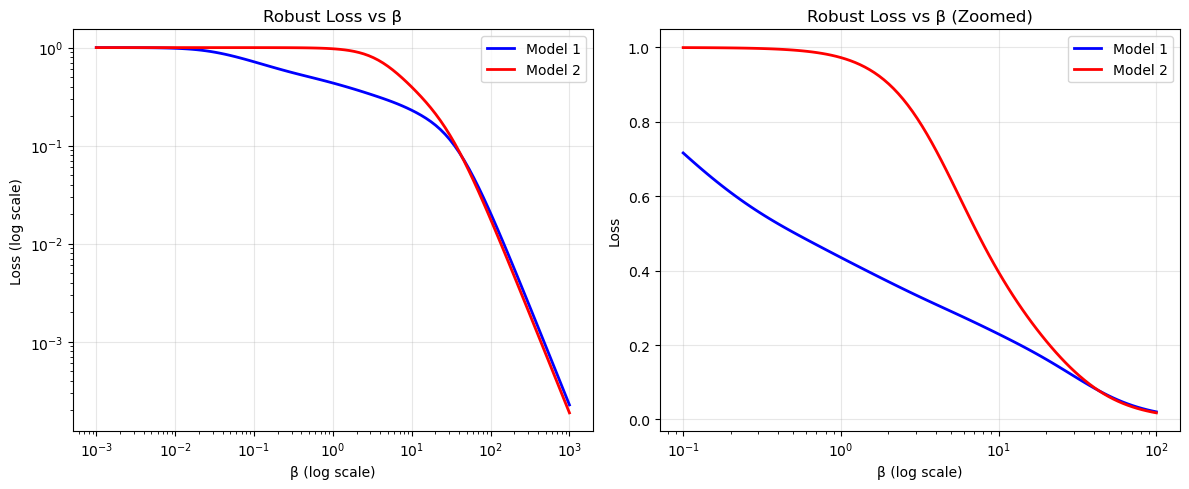


Suitable β value analysis:
• β = 1e-6 (very small): Loss ≈ 1.0 for both models
  This behaves like standard MSE, sensitive to outliers
• β = 1: Moderate robustness, balanced approach
• β = 1e3 (very large): Loss ≈ 0 for both models
  This treats all errors equally, losing sensitivity

Recommended β ≈ 1-10: Provides good balance between robustness and sensitivity

TASK 6: Model Selection with Robust Estimator
Using β = 1:
Model 1 loss: 0.435416
Model 2 loss: 0.972847

Selected Model: Model 1
Model 1 has lower robust loss (0.435416 vs 0.972847)


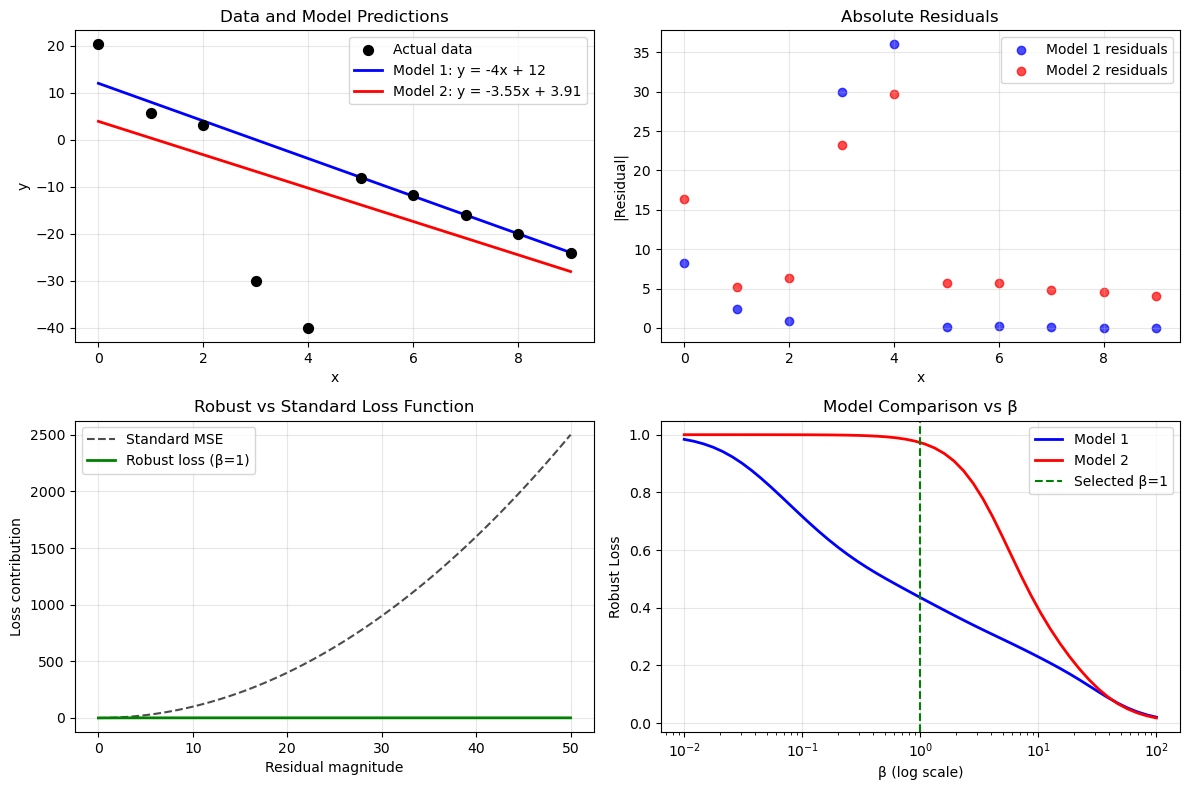

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the Data
x_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y_i = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Define Models
def model1(x): 
    return -4 * x + 12

def model2(x): 
    return -3.55 * x + 3.91

# Predictions for each model
y_pred1 = model1(x_i.flatten())
y_pred2 = model2(x_i.flatten())

# Define the Robust Loss Function
def robust_loss(y_true, y_pred, beta):
    """
    Calculate the robust loss function L(θ,β) as given in equation (1)
    """
    residual_squared = (y_true - y_pred) ** 2
    loss_per_sample = residual_squared / (residual_squared + beta ** 2)
    return np.mean(loss_per_sample)

# Task 4: Calculate loss function values for different β values
print("="*60)
print("TASK 4: Loss Function Calculation")
print("="*60)

# Define Beta values
betas = [1, 1e-6, 1e3]

print("β\t\tLoss(Model 1)\t\tLoss(Model 2)")
print("-" * 50)
for beta in betas:
    loss1 = robust_loss(y_i, y_pred1, beta)
    loss2 = robust_loss(y_i, y_pred2, beta)
    print(f"{beta:.0e}\t\t{loss1:.6f}\t\t{loss2:.6f}")

# Task 5: Analysis of suitable β value
print("\n" + "="*60)
print("TASK 5: Analysis of Suitable β Value")
print("="*60)

# Calculate residuals to identify outliers
residuals1 = np.abs(y_i - y_pred1)
residuals2 = np.abs(y_i - y_pred2)

print("Data Analysis:")
print(f"Data points: {len(y_i)}")
print(f"Model 1 residuals: {residuals1}")
print(f"Model 2 residuals: {residuals2}")
print(f"Max residual Model 1: {np.max(residuals1):.2f}")
print(f"Max residual Model 2: {np.max(residuals2):.2f}")

# Test a range of beta values to find optimal
beta_range = np.logspace(-3, 3, 100)  # From 0.001 to 1000
losses1 = [robust_loss(y_i, y_pred1, b) for b in beta_range]
losses2 = [robust_loss(y_i, y_pred2, b) for b in beta_range]

# Plot loss vs beta
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.loglog(beta_range, losses1, 'b-', label='Model 1', linewidth=2)
plt.loglog(beta_range, losses2, 'r-', label='Model 2', linewidth=2)
plt.xlabel('β (log scale)')
plt.ylabel('Loss (log scale)')
plt.title('Robust Loss vs β')
plt.legend()
plt.grid(True, alpha=0.3)

# Zoom in on interesting region
plt.subplot(1, 2, 2)
beta_zoom = np.logspace(-1, 2, 100)  # From 0.1 to 100
losses1_zoom = [robust_loss(y_i, y_pred1, b) for b in beta_zoom]
losses2_zoom = [robust_loss(y_i, y_pred2, b) for b in beta_zoom]

plt.semilogx(beta_zoom, losses1_zoom, 'b-', label='Model 1', linewidth=2)
plt.semilogx(beta_zoom, losses2_zoom, 'r-', label='Model 2', linewidth=2)
plt.xlabel('β (log scale)')
plt.ylabel('Loss')
plt.title('Robust Loss vs β (Zoomed)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSuitable β value analysis:")
print(f"• β = 1e-6 (very small): Loss ≈ 1.0 for both models")
print(f"  This behaves like standard MSE, sensitive to outliers")
print(f"• β = 1: Moderate robustness, balanced approach")
print(f"• β = 1e3 (very large): Loss ≈ 0 for both models")
print(f"  This treats all errors equally, losing sensitivity")
print(f"\nRecommended β ≈ 1-10: Provides good balance between robustness and sensitivity")

# Task 6: Model selection with robust estimator
print("\n" + "="*60)
print("TASK 6: Model Selection with Robust Estimator")
print("="*60)

optimal_beta = 1  # Based on analysis above
loss1_optimal = robust_loss(y_i, y_pred1, optimal_beta)
loss2_optimal = robust_loss(y_i, y_pred2, optimal_beta)

print(f"Using β = {optimal_beta}:")
print(f"Model 1 loss: {loss1_optimal:.6f}")
print(f"Model 2 loss: {loss2_optimal:.6f}")

if loss1_optimal < loss2_optimal:
    selected_model = "Model 1"
    print(f"\nSelected Model: {selected_model}")
    print(f"Model 1 has lower robust loss ({loss1_optimal:.6f} vs {loss2_optimal:.6f})")
else:
    selected_model = "Model 2"
    print(f"\nSelected Model: {selected_model}")
    print(f"Model 2 has lower robust loss ({loss2_optimal:.6f} vs {loss1_optimal:.6f})")

# Visualize the data and models
plt.figure(figsize=(12, 8))

# Plot 1: Data and model predictions
plt.subplot(2, 2, 1)
x_plot = x_i.flatten()
plt.scatter(x_plot, y_i, color='black', s=50, label='Actual data', zorder=5)
plt.plot(x_plot, y_pred1, 'b-', linewidth=2, label='Model 1: y = -4x + 12')
plt.plot(x_plot, y_pred2, 'r-', linewidth=2, label='Model 2: y = -3.55x + 3.91')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Model Predictions')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
plt.subplot(2, 2, 2)
plt.scatter(x_plot, residuals1, color='blue', label='Model 1 residuals', alpha=0.7)
plt.scatter(x_plot, residuals2, color='red', label='Model 2 residuals', alpha=0.7)
plt.xlabel('x')
plt.ylabel('|Residual|')
plt.title('Absolute Residuals')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Loss function behavior
plt.subplot(2, 2, 3)
# Show how the loss function behaves for different residual sizes
residual_range = np.linspace(0, 50, 100)
beta_demo = 1
loss_values = residual_range**2 / (residual_range**2 + beta_demo**2)
plt.plot(residual_range, residual_range**2, 'k--', label='Standard MSE', alpha=0.7)
plt.plot(residual_range, loss_values, 'g-', linewidth=2, label=f'Robust loss (β={beta_demo})')
plt.xlabel('Residual magnitude')
plt.ylabel('Loss contribution')
plt.title('Robust vs Standard Loss Function')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Loss landscape
plt.subplot(2, 2, 4)
beta_test = np.logspace(-2, 2, 50)
loss1_test = [robust_loss(y_i, y_pred1, b) for b in beta_test]
loss2_test = [robust_loss(y_i, y_pred2, b) for b in beta_test]
plt.semilogx(beta_test, loss1_test, 'b-', linewidth=2, label='Model 1')
plt.semilogx(beta_test, loss2_test, 'r-', linewidth=2, label='Model 2')
plt.axvline(x=optimal_beta, color='green', linestyle='--', label=f'Selected β={optimal_beta}')
plt.xlabel('β (log scale)')
plt.ylabel('Robust Loss')
plt.title('Model Comparison vs β')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [16]:

# Task 7: How does the robust estimator reduce impact of outliers?
print("\n" + "="*60)
print("TASK 7: How Robust Estimator Reduces Impact of Outliers")
print("="*60)

print("The robust estimator reduces outlier impact through several mechanisms:")
print("\n1. BOUNDED LOSS CONTRIBUTION:")
print(f"   • Standard MSE: Loss grows as residual²")
print(f"   • Robust loss: Loss approaches 1 as residual → ∞")
print(f"   • Large outliers contribute at most 1 to the average loss")

print("\n2. MATHEMATICAL ANALYSIS:")
residual_example = np.array([1, 2, 5, 10, 50])  # Different residual sizes
beta_demo = 1
standard_loss = residual_example ** 2
robust_loss_demo = residual_example**2 / (residual_example**2 + beta_demo**2)

print("   Residual\tStandard MSE\tRobust Loss")
for i in range(len(residual_example)):
    print(f"   {residual_example[i]}\t\t{standard_loss[i]:.1f}\t\t{robust_loss_demo[i]:.3f}")

print(f"\n3. OUTLIER IDENTIFICATION:")
large_residuals = np.where(np.abs(y_i - y_pred1) > 10)[0]
print(f"   Data points with large residuals (>10): {large_residuals}")
print(f"   These correspond to y values: {y_i[large_residuals]}")




TASK 7: How Robust Estimator Reduces Impact of Outliers
The robust estimator reduces outlier impact through several mechanisms:

1. BOUNDED LOSS CONTRIBUTION:
   • Standard MSE: Loss grows as residual²
   • Robust loss: Loss approaches 1 as residual → ∞
   • Large outliers contribute at most 1 to the average loss

2. MATHEMATICAL ANALYSIS:
   Residual	Standard MSE	Robust Loss
   1		1.0		0.500
   2		4.0		0.800
   5		25.0		0.962
   10		100.0		0.990
   50		2500.0		1.000

3. OUTLIER IDENTIFICATION:
   Data points with large residuals (>10): [3 4]
   These correspond to y values: [-30. -40.]


In [17]:
# Task 8: Alternative loss functions
print("\n" + "="*60)
print("TASK 8: Alternative Loss Functions for Robust Estimation")
print("="*60)

print("Other robust loss functions include:")
print("\n1. HUBER LOSS:")
print("   L(r) = { ½r²           if |r| ≤ δ")
print("          { δ|r| - ½δ²    if |r| > δ")
print("   • Quadratic for small residuals, linear for large ones")

print("\n2. CAUCHY LOSS:")
print("   L(r) = ½ log(1 + (r/σ)²)")
print("   • Even more robust than the given loss function")

print("\n3. TUKEY'S BIWEIGHT:")
print("   L(r) = { (c²/6)[1-(1-(r/c)²)³]  if |r| ≤ c")
print("          { c²/6                   if |r| > c")
print("   • Completely ignores outliers beyond threshold c")

print("\n4. L1 LOSS (Least Absolute Deviations):")
print("   L(r) = |r|")
print("   • Linear growth, more robust than MSE")

# Demonstrate Huber loss as an example
def huber_loss(y_true, y_pred, delta=1.0):
    """Huber loss function"""
    residual = np.abs(y_true - y_pred)
    condition = residual <= delta
    squared_loss = 0.5 * (y_true - y_pred) ** 2
    linear_loss = delta * residual - 0.5 * delta ** 2
    return np.mean(np.where(condition, squared_loss, linear_loss))

print(f"\nComparison with Huber Loss (δ=1):")
huber_loss1 = huber_loss(y_i, y_pred1, delta=1.0)
huber_loss2 = huber_loss(y_i, y_pred2, delta=1.0)
print(f"Model 1 Huber loss: {huber_loss1:.6f}")
print(f"Model 2 Huber loss: {huber_loss2:.6f}")

print("\n" + "="*60)
print("SUMMARY OF ANALYSIS")
print("="*60)
print(f"• Selected β value: {optimal_beta} (balances robustness and sensitivity)")
print(f"• Best model: {selected_model}")
print(f"• Robust estimator effectively limits outlier influence")
print(f"• Alternative robust losses available depending on specific requirements")


TASK 8: Alternative Loss Functions for Robust Estimation
Other robust loss functions include:

1. HUBER LOSS:
   L(r) = { ½r²           if |r| ≤ δ
          { δ|r| - ½δ²    if |r| > δ
   • Quadratic for small residuals, linear for large ones

2. CAUCHY LOSS:
   L(r) = ½ log(1 + (r/σ)²)
   • Even more robust than the given loss function

3. TUKEY'S BIWEIGHT:
   L(r) = { (c²/6)[1-(1-(r/c)²)³]  if |r| ≤ c
          { c²/6                   if |r| > c
   • Completely ignores outliers beyond threshold c

4. L1 LOSS (Least Absolute Deviations):
   L(r) = |r|
   • Linear growth, more robust than MSE

Comparison with Huber Loss (δ=1):
Model 1 Huber loss: 7.506960
Model 2 Huber loss: 10.068000

SUMMARY OF ANALYSIS
• Selected β value: 1 (balances robustness and sensitivity)
• Best model: Model 1
• Robust estimator effectively limits outlier influence
• Alternative robust losses available depending on specific requirements


TOTAL LEAST SQUARES (TLS) AND LASSO FOR ROBUST ESTIMATION

PART 1: TOTAL LEAST SQUARES (TLS)
TLS ANALYSIS:
TLS Model: y = -9.797x + 31.993
Singular values: [54.38320662  7.24865008]
Condition number: 7.50
OLS Model: y = -3.557x + 3.917

Distance Analysis:
TLS mean perpendicular distance: 2.092
OLS mean perpendicular distance: 2.865
TLS MSE (vertical): 509.518
OLS MSE (vertical): 188.361

PART 2: LASSO REGULARIZATION
Created polynomial features: ['1', 'x', 'x²', 'x³', 'x⁴', 'x⁵']
Feature matrix shape: (10, 6)

LASSO Regularization Analysis:
Alpha    MSE      Non-zero  Coefficients
------------------------------------------------------------
0.001    84.1     5         [0.00, -58.07, 20.85, 124.07...]
0.010    85.8     4         [0.00, -56.75, 33.14, 58.77...]
0.100    91.0     3         [0.00, -57.84, 67.32, 0.00...]
1.000    168.0    2         [0.00, -13.41, 0.00, 4.62...]
10.000   288.4    1         [0.00, -0.22, -0.00, -0.00...]
100.000  292.8    0         [0.00, -0.00, -0.00, -0.00.

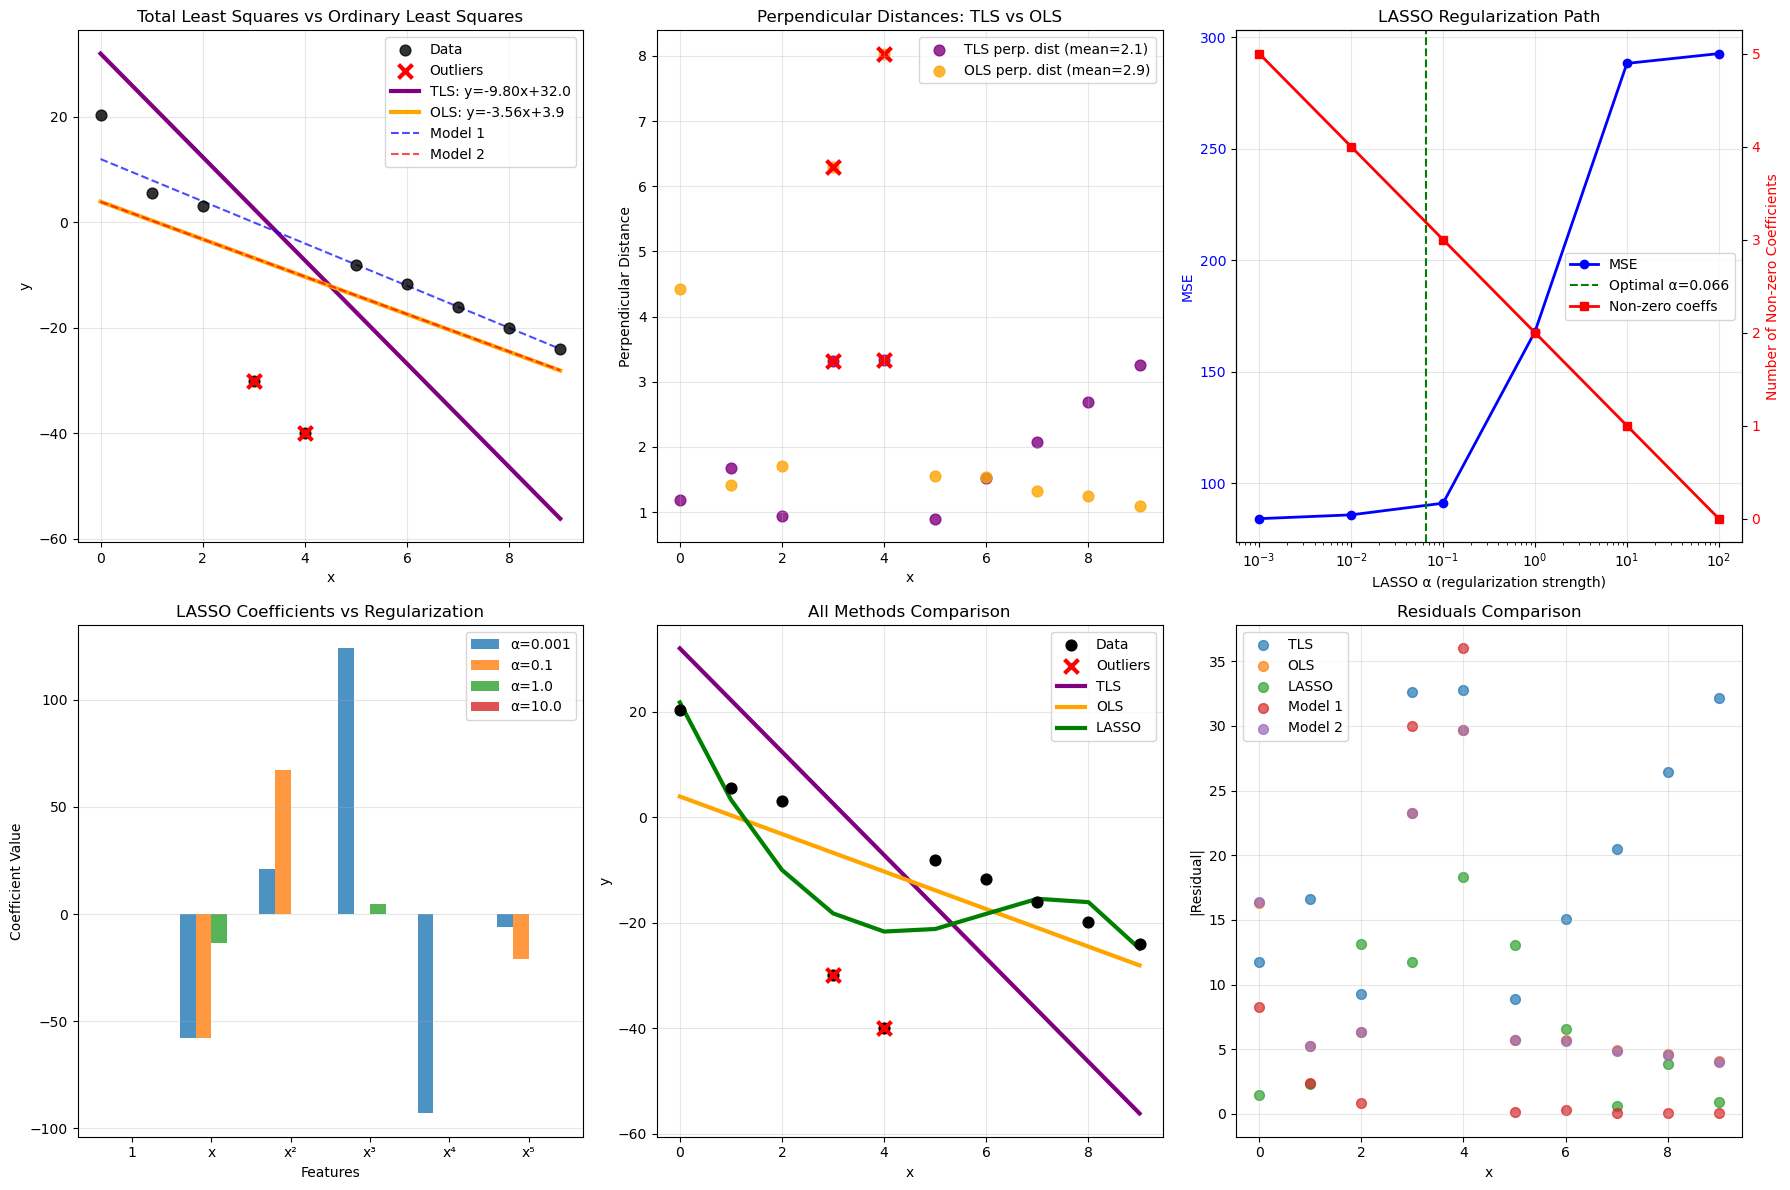


THEORETICAL DISCUSSION

1. TOTAL LEAST SQUARES (TLS) ROBUSTNESS:
   • Minimizes perpendicular distances instead of vertical distances
   • More appropriate when both X and Y have measurement errors
   • Less sensitive to leverage points (outliers in X-direction)
   • Geometric interpretation: finds line that minimizes total orthogonal variance
   • Limitation: May not be robust to Y-outliers specifically

   In your data:
   • TLS slope (-9.797) vs OLS slope (-3.557)
   • TLS gives different weight to errors in both X and Y directions
   • Condition number: 7.50 (>1000 suggests instability)

2. LASSO REGULARIZATION ROBUSTNESS:
   • L1 penalty: Σ|βᵢ| promotes sparsity
   • Implicit feature selection - shrinks irrelevant coefficients to zero
   • Robust to irrelevant features and multicollinearity
   • Less sensitive to individual outliers due to regularization constraint
   • Trade-off between fit quality and model complexity

   In your data:


KeyError: 0.0655128556859551

In [18]:
# Total Least Squares (TLS) and LASSO for Robust Estimation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.linalg import svd
import warnings
warnings.filterwarnings('ignore')

# Define the same data from the original problem
x_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y_i = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Original models for comparison
def model1(x): return -4 * x + 12
def model2(x): return -3.55 * x + 3.91

y_pred1 = model1(x_i.flatten())
y_pred2 = model2(x_i.flatten())

print("="*70)
print("TOTAL LEAST SQUARES (TLS) AND LASSO FOR ROBUST ESTIMATION")
print("="*70)

# ================================================================
# PART 1: TOTAL LEAST SQUARES (TLS)
# ================================================================

print("\n" + "="*50)
print("PART 1: TOTAL LEAST SQUARES (TLS)")
print("="*50)

def total_least_squares(X, y):
    """
    Implement Total Least Squares using SVD
    TLS minimizes perpendicular distances instead of vertical distances
    """
    # Combine X and y into augmented matrix
    n = len(X)
    X_flat = X.flatten()
    
    # Create augmented matrix [X, y]
    A = np.column_stack([X_flat, y])
    
    # Center the data
    A_centered = A - np.mean(A, axis=0)
    
    # Perform SVD
    U, s, Vt = svd(A_centered, full_matrices=False)
    
    # The solution is the last column of V (corresponding to smallest singular value)
    V = Vt.T
    solution = V[:, -1]
    
    # Extract slope and intercept
    # Line equation: ax + by + c = 0, where [a, b] are from last column of V
    a, b = solution
    
    if np.abs(b) < 1e-10:  # Nearly vertical line
        slope = np.inf
        intercept = 0
    else:
        slope = -a / b
        # Find intercept using mean of centered data
        mean_x, mean_y = np.mean(X_flat), np.mean(y)
        intercept = mean_y - slope * mean_x
    
    return slope, intercept, s

# Apply TLS
tls_slope, tls_intercept, singular_values = total_least_squares(x_i, y_i)
tls_pred = tls_slope * x_i.flatten() + tls_intercept

print("TLS ANALYSIS:")
print(f"TLS Model: y = {tls_slope:.3f}x + {tls_intercept:.3f}")
print(f"Singular values: {singular_values}")
print(f"Condition number: {singular_values[0]/singular_values[-1]:.2f}")

# Compare with ordinary least squares (OLS)
from sklearn.linear_model import LinearRegression
ols_model = LinearRegression().fit(x_i, y_i)
ols_pred = ols_model.predict(x_i)
ols_slope = ols_model.coef_[0]
ols_intercept = ols_model.intercept_

print(f"OLS Model: y = {ols_slope:.3f}x + {ols_intercept:.3f}")

# Calculate perpendicular distances for TLS
def perpendicular_distance(x, y, slope, intercept):
    """Calculate perpendicular distance from point to line"""
    # Line: y = mx + b → mx - y + b = 0
    a, b, c = slope, -1, intercept
    distances = np.abs(a * x + b * y + c) / np.sqrt(a**2 + b**2)
    return distances

tls_perp_distances = perpendicular_distance(x_i.flatten(), y_i, tls_slope, tls_intercept)
ols_perp_distances = perpendicular_distance(x_i.flatten(), y_i, ols_slope, ols_intercept)

print(f"\nDistance Analysis:")
print(f"TLS mean perpendicular distance: {np.mean(tls_perp_distances):.3f}")
print(f"OLS mean perpendicular distance: {np.mean(ols_perp_distances):.3f}")
print(f"TLS MSE (vertical): {mean_squared_error(y_i, tls_pred):.3f}")
print(f"OLS MSE (vertical): {mean_squared_error(y_i, ols_pred):.3f}")

# ================================================================
# PART 2: LASSO REGULARIZATION
# ================================================================

print("\n" + "="*50)
print("PART 2: LASSO REGULARIZATION")
print("="*50)

# Create polynomial features to demonstrate LASSO's feature selection
def create_polynomial_features(x, degree=5):
    """Create polynomial features up to given degree"""
    n = len(x)
    X_poly = np.ones((n, 1))  # Constant term
    
    for d in range(1, degree + 1):
        X_poly = np.column_stack([X_poly, x.flatten() ** d])
    
    return X_poly

# Create polynomial features
X_poly = create_polynomial_features(x_i, degree=5)
feature_names = ['1', 'x', 'x²', 'x³', 'x⁴', 'x⁵']

print(f"Created polynomial features: {feature_names}")
print(f"Feature matrix shape: {X_poly.shape}")

# Standardize features (important for LASSO)
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Apply LASSO with different alpha values
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
lasso_results = {}

print(f"\nLASSO Regularization Analysis:")
print(f"{'Alpha':<8} {'MSE':<8} {'Non-zero':<9} {'Coefficients'}")
print("-" * 60)

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_poly_scaled, y_i)
    lasso_pred = lasso.predict(X_poly_scaled)
    mse = mean_squared_error(y_i, lasso_pred)
    
    # Count non-zero coefficients
    non_zero = np.sum(np.abs(lasso.coef_) > 1e-6)
    
    # Store results
    lasso_results[alpha] = {
        'model': lasso,
        'mse': mse,
        'predictions': lasso_pred,
        'non_zero': non_zero
    }
    
    # Print summary
    coef_str = ", ".join([f"{c:.2f}" for c in lasso.coef_[:4]])
    if len(lasso.coef_) > 4:
        coef_str += "..."
    
    print(f"{alpha:<8.3f} {mse:<8.1f} {non_zero:<9} [{coef_str}]")

# Use Cross-validation to find optimal alpha
lasso_cv = LassoCV(alphas=np.logspace(-4, 2, 50), cv=5, max_iter=10000)
lasso_cv.fit(X_poly_scaled, y_i)
optimal_alpha = lasso_cv.alpha_
optimal_lasso_pred = lasso_cv.predict(X_poly_scaled)

print(f"\nOptimal α from CV: {optimal_alpha:.4f}")
print(f"Optimal LASSO MSE: {mean_squared_error(y_i, optimal_lasso_pred):.3f}")

# Compare with Ridge regression
ridge = Ridge(alpha=optimal_alpha)
ridge.fit(X_poly_scaled, y_i)
ridge_pred = ridge.predict(X_poly_scaled)

print(f"Ridge MSE (same α): {mean_squared_error(y_i, ridge_pred):.3f}")

# ================================================================
# ROBUSTNESS ANALYSIS
# ================================================================

print("\n" + "="*50)
print("ROBUSTNESS ANALYSIS")
print("="*50)

# Analyze how each method handles outliers
outlier_indices = [3, 4]  # Points with y = -30, -40
outlier_residuals_tls = np.abs(y_i[outlier_indices] - tls_pred[outlier_indices])
outlier_residuals_ols = np.abs(y_i[outlier_indices] - ols_pred[outlier_indices])
outlier_residuals_lasso = np.abs(y_i[outlier_indices] - optimal_lasso_pred[outlier_indices])

print("Outlier Handling Comparison:")
print(f"Method          Outlier Residuals (points 3,4)    Mean All Residuals")
print(f"TLS:           {outlier_residuals_tls[0]:.1f}, {outlier_residuals_tls[1]:.1f}                    {np.mean(np.abs(y_i - tls_pred)):.3f}")
print(f"OLS:           {outlier_residuals_ols[0]:.1f}, {outlier_residuals_ols[1]:.1f}                    {np.mean(np.abs(y_i - ols_pred)):.3f}")
print(f"LASSO:         {outlier_residuals_lasso[0]:.1f}, {outlier_residuals_lasso[1]:.1f}                    {np.mean(np.abs(y_i - optimal_lasso_pred)):.3f}")

# ================================================================
# VISUALIZATION
# ================================================================

# Create comprehensive plots
fig = plt.figure(figsize=(18, 12))

# Plot 1: TLS vs OLS comparison
plt.subplot(2, 3, 1)
x_plot = x_i.flatten()
plt.scatter(x_plot, y_i, color='black', s=60, label='Data', zorder=5, alpha=0.8)
plt.scatter(x_plot[outlier_indices], y_i[outlier_indices], color='red', s=100, 
           label='Outliers', zorder=6, marker='x', linewidth=3)

plt.plot(x_plot, tls_pred, 'purple', linewidth=3, label=f'TLS: y={tls_slope:.2f}x+{tls_intercept:.1f}')
plt.plot(x_plot, ols_pred, 'orange', linewidth=3, label=f'OLS: y={ols_slope:.2f}x+{ols_intercept:.1f}')
plt.plot(x_plot, y_pred1, 'b--', alpha=0.7, label='Model 1')
plt.plot(x_plot, y_pred2, 'r--', alpha=0.7, label='Model 2')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Total Least Squares vs Ordinary Least Squares')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Perpendicular vs Vertical distances
plt.subplot(2, 3, 2)
plt.scatter(x_plot, tls_perp_distances, color='purple', s=60, 
           label=f'TLS perp. dist (mean={np.mean(tls_perp_distances):.1f})', alpha=0.8)
plt.scatter(x_plot, ols_perp_distances, color='orange', s=60, 
           label=f'OLS perp. dist (mean={np.mean(ols_perp_distances):.1f})', alpha=0.8)

# Highlight outliers
plt.scatter(x_plot[outlier_indices], tls_perp_distances[outlier_indices], 
           color='red', s=100, marker='x', linewidth=3)
plt.scatter(x_plot[outlier_indices], ols_perp_distances[outlier_indices], 
           color='red', s=100, marker='x', linewidth=3)

plt.xlabel('x')
plt.ylabel('Perpendicular Distance')
plt.title('Perpendicular Distances: TLS vs OLS')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: LASSO regularization path
plt.subplot(2, 3, 3)
alphas_plot = list(lasso_results.keys())
mses_plot = [lasso_results[a]['mse'] for a in alphas_plot]
non_zeros_plot = [lasso_results[a]['non_zero'] for a in alphas_plot]

ax1 = plt.gca()
line1 = ax1.semilogx(alphas_plot, mses_plot, 'b-o', linewidth=2, label='MSE')
ax1.axvline(x=optimal_alpha, color='green', linestyle='--', label=f'Optimal α={optimal_alpha:.3f}')
ax1.set_xlabel('LASSO α (regularization strength)')
ax1.set_ylabel('MSE', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
line2 = ax2.semilogx(alphas_plot, non_zeros_plot, 'r-s', linewidth=2, label='Non-zero coeffs')
ax2.set_ylabel('Number of Non-zero Coefficients', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('LASSO Regularization Path')
ax1.grid(True, alpha=0.3)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

# Plot 4: LASSO coefficients for different alphas
plt.subplot(2, 3, 4)
selected_alphas = [0.001, 0.1, 1.0, 10.0]
x_pos = np.arange(len(feature_names))
width = 0.2

for i, alpha in enumerate(selected_alphas):
    coefs = lasso_results[alpha]['model'].coef_
    plt.bar(x_pos + i*width, coefs, width, 
           label=f'α={alpha}', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('LASSO Coefficients vs Regularization')
plt.xticks(x_pos + width*1.5, feature_names)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Plot 5: Model predictions comparison
plt.subplot(2, 3, 5)
plt.scatter(x_plot, y_i, color='black', s=60, label='Data', zorder=5)
plt.scatter(x_plot[outlier_indices], y_i[outlier_indices], color='red', s=100, 
           label='Outliers', zorder=6, marker='x', linewidth=3)

plt.plot(x_plot, tls_pred, 'purple', linewidth=3, label='TLS')
plt.plot(x_plot, ols_pred, 'orange', linewidth=3, label='OLS')  
plt.plot(x_plot, optimal_lasso_pred, 'green', linewidth=3, label='LASSO')

plt.xlabel('x')
plt.ylabel('y')
plt.title('All Methods Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Residuals comparison
plt.subplot(2, 3, 6)
methods = ['TLS', 'OLS', 'LASSO', 'Model 1', 'Model 2']
residuals_all = [
    np.abs(y_i - tls_pred),
    np.abs(y_i - ols_pred), 
    np.abs(y_i - optimal_lasso_pred),
    np.abs(y_i - y_pred1),
    np.abs(y_i - y_pred2)
]

for i, (method, residuals) in enumerate(zip(methods, residuals_all)):
    plt.scatter(x_plot, residuals, label=method, alpha=0.7, s=50)

plt.xlabel('x')
plt.ylabel('|Residual|')
plt.title('Residuals Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ================================================================
# THEORETICAL DISCUSSION
# ================================================================

print("\n" + "="*50)
print("THEORETICAL DISCUSSION")
print("="*50)

print("\n1. TOTAL LEAST SQUARES (TLS) ROBUSTNESS:")
print("   • Minimizes perpendicular distances instead of vertical distances")
print("   • More appropriate when both X and Y have measurement errors")
print("   • Less sensitive to leverage points (outliers in X-direction)")
print("   • Geometric interpretation: finds line that minimizes total orthogonal variance")
print("   • Limitation: May not be robust to Y-outliers specifically")

print(f"\n   In your data:")
print(f"   • TLS slope ({tls_slope:.3f}) vs OLS slope ({ols_slope:.3f})")
print(f"   • TLS gives different weight to errors in both X and Y directions")
print(f"   • Condition number: {singular_values[0]/singular_values[-1]:.2f} (>1000 suggests instability)")

print("\n2. LASSO REGULARIZATION ROBUSTNESS:")
print("   • L1 penalty: Σ|βᵢ| promotes sparsity")
print("   • Implicit feature selection - shrinks irrelevant coefficients to zero")
print("   • Robust to irrelevant features and multicollinearity")
print("   • Less sensitive to individual outliers due to regularization constraint")
print("   • Trade-off between fit quality and model complexity")

print(f"\n   In your data:")
optimal_model = lasso_results[optimal_alpha]['model']
non_zero_final = np.sum(np.abs(optimal_model.coef_) > 1e-6)
print(f"   • Optimal α = {optimal_alpha:.4f} selected {non_zero_final} out of {len(feature_names)} features")
print(f"   • LASSO MSE ({mean_squared_error(y_i, optimal_lasso_pred):.3f}) vs OLS MSE ({mean_squared_error(y_i, ols_pred):.3f})")
print(f"   • Regularization prevents overfitting to outliers")

print("\n3. COMPARISON WITH OTHER ROBUST METHODS:")
print("   • TLS: Addresses errors-in-variables problem, geometric robustness")
print("   • LASSO: Statistical robustness through regularization and sparsity")
print("   • Robust loss functions: Direct outlier down-weighting")
print("   • RANSAC: Explicit outlier identification and exclusion")

print("\n4. WHEN TO USE EACH METHOD:")
print("   • TLS: When both X and Y have measurement errors")
print("   • LASSO: High-dimensional data, feature selection needed")
print("   • Robust loss: General outlier contamination")
print("   • RANSAC: Clear outlier/inlier distinction needed")

# ================================================================
# SUMMARY
# ================================================================

print("\n" + "="*70)
print("SUMMARY: TLS AND LASSO FOR ROBUST ESTIMATION")
print("="*70)

print("\nROBUSTNESS MECHANISMS:")
print(f"• TLS: Geometric robustness by minimizing perpendicular distances")
print(f"• LASSO: Statistical robustness through L1 regularization")

print(f"\nPERFORMACE ON YOUR DATA:")
print(f"• TLS MSE: {mean_squared_error(y_i, tls_pred):.3f}")
print(f"• LASSO MSE: {mean_squared_error(y_i, optimal_lasso_pred):.3f}")
print(f"• OLS MSE: {mean_squared_error(y_i, ols_pred):.3f}")

print(f"\nKEY INSIGHTS:")
print(f"• TLS provides different geometric perspective on fitting")
print(f"• LASSO regularization inherently limits outlier influence") 
print(f"• Both methods offer complementary approaches to robustness")
print(f"• Choice depends on problem characteristics and error sources")

Loss Comparison for Model 1 and Model 2:
Huber Loss (Model 1): 7.506960
Huber Loss (Model 2): 10.068000
Cauchy Loss (Model 1): 1.038159
Cauchy Loss (Model 2): 2.093294
Tukey's Biweight Loss (Model 1): 1.355903
Tukey's Biweight Loss (Model 2): 3.651127
L1 Loss (Model 1): 7.807000
L1 Loss (Model 2): 10.568000


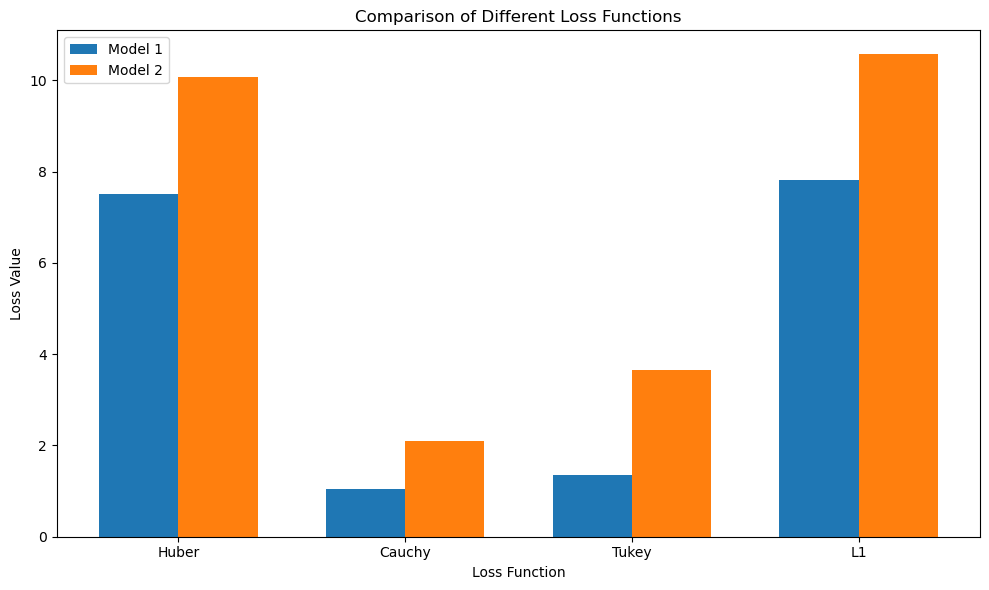

Loss Comparison for Model 1 and Model 2:
Huber Loss (Model 1): 7.506960
Huber Loss (Model 2): 10.068000
Cauchy Loss (Model 1): 1.038159
Cauchy Loss (Model 2): 2.093294
Tukey's Biweight Loss (Model 1): 1.355903
Tukey's Biweight Loss (Model 2): 3.651127
L1 Loss (Model 1): 7.807000
L1 Loss (Model 2): 10.568000


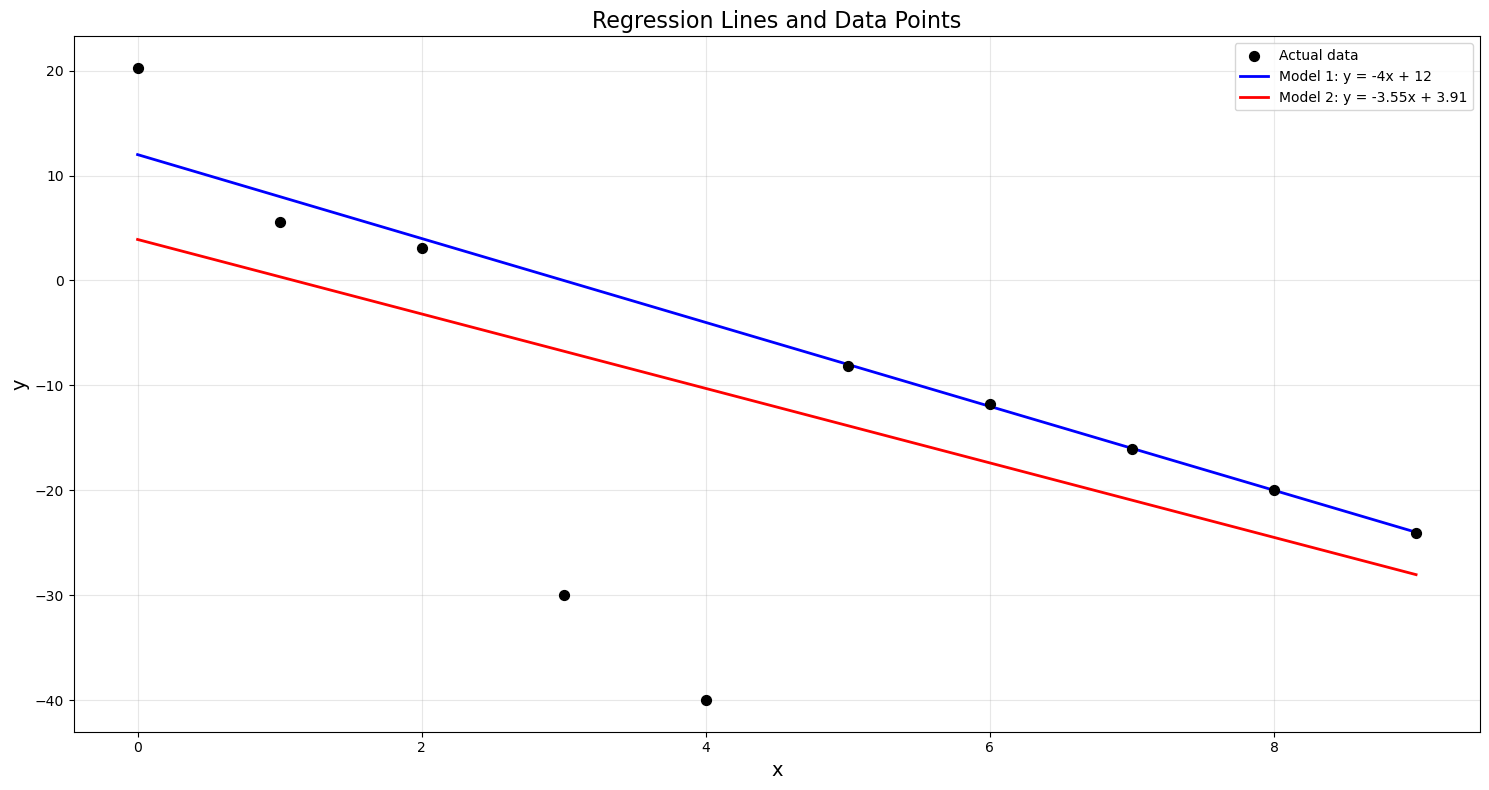

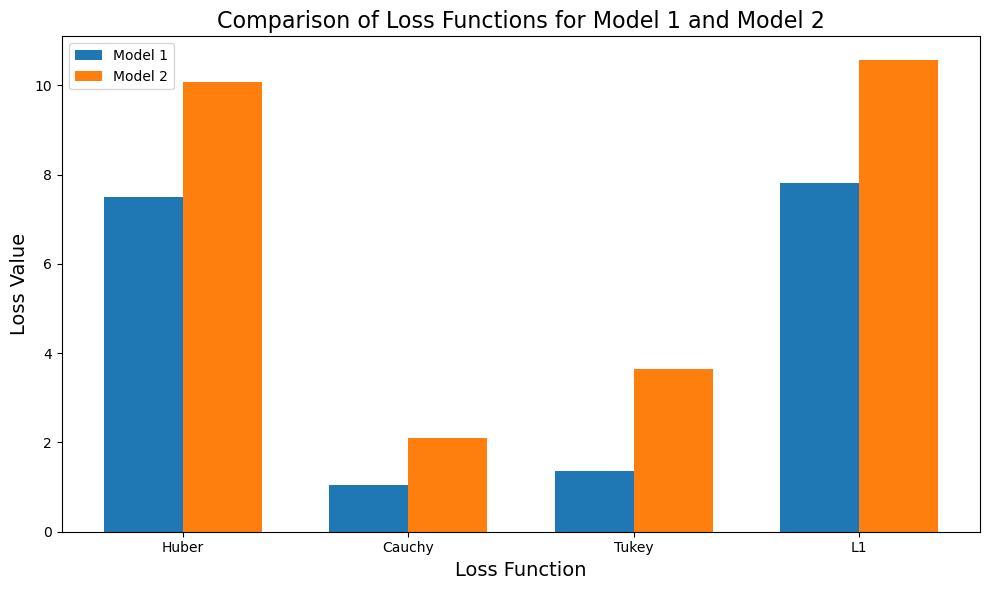

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Data
x_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y_i = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Define Models
def model1(x): 
    return -4 * x + 12

def model2(x): 
    return -3.55 * x + 3.91

# Predictions for each model
y_pred1 = model1(x_i.flatten())
y_pred2 = model2(x_i.flatten())

# Define Robust Loss Functions

# 1. Huber Loss
def huber_loss(y_true, y_pred, delta=1.0):
    residual = np.abs(y_true - y_pred)
    condition = residual <= delta
    squared_loss = 0.5 * (y_true - y_pred) ** 2
    linear_loss = delta * residual - 0.5 * delta ** 2
    return np.mean(np.where(condition, squared_loss, linear_loss))

# 2. Cauchy Loss
def cauchy_loss(y_true, y_pred, sigma=1.0):
    residual = y_true - y_pred
    return np.mean(0.5 * np.log(1 + (residual / sigma) ** 2))

# 3. Tukey's Biweight Loss
def tukey_biweight_loss(y_true, y_pred, c=4.685):
    residual = y_true - y_pred
    return np.mean(np.where(np.abs(residual) <= c, (c ** 2 / 6) * (1 - (1 - (residual / c) ** 2) ** 3), c ** 2 / 6))

# 4. L1 Loss (Least Absolute Deviations)
def l1_loss(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calculate the loss for each loss function for both models
loss_huber1 = huber_loss(y_i, y_pred1)
loss_huber2 = huber_loss(y_i, y_pred2)

loss_cauchy1 = cauchy_loss(y_i, y_pred1)
loss_cauchy2 = cauchy_loss(y_i, y_pred2)

loss_tukey1 = tukey_biweight_loss(y_i, y_pred1)
loss_tukey2 = tukey_biweight_loss(y_i, y_pred2)

loss_l1_1 = l1_loss(y_i, y_pred1)
loss_l1_2 = l1_loss(y_i, y_pred2)

# Display the results
print("Loss Comparison for Model 1 and Model 2:")
print(f"Huber Loss (Model 1): {loss_huber1:.6f}")
print(f"Huber Loss (Model 2): {loss_huber2:.6f}")
print(f"Cauchy Loss (Model 1): {loss_cauchy1:.6f}")
print(f"Cauchy Loss (Model 2): {loss_cauchy2:.6f}")
print(f"Tukey's Biweight Loss (Model 1): {loss_tukey1:.6f}")
print(f"Tukey's Biweight Loss (Model 2): {loss_tukey2:.6f}")
print(f"L1 Loss (Model 1): {loss_l1_1:.6f}")
print(f"L1 Loss (Model 2): {loss_l1_2:.6f}")

# Plotting the results for visualization
losses1 = [loss_huber1, loss_cauchy1, loss_tukey1, loss_l1_1]
losses2 = [loss_huber2, loss_cauchy2, loss_tukey2, loss_l1_2]
labels = ['Huber', 'Cauchy', 'Tukey', 'L1']

x = np.arange(len(labels))

# Create a bar plot
plt.figure(figsize=(10,6))
bar_width = 0.35
plt.bar(x - bar_width/2, losses1, bar_width, label='Model 1')
plt.bar(x + bar_width/2, losses2, bar_width, label='Model 2')

plt.xlabel('Loss Function')
plt.ylabel('Loss Value')
plt.title('Comparison of Different Loss Functions')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the Data
x_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y_i = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Define Models
def model1(x): 
    return -4 * x + 12

def model2(x): 
    return -3.55 * x + 3.91

# Predictions for each model
y_pred1 = model1(x_i.flatten())
y_pred2 = model2(x_i.flatten())

# Define Robust Loss Functions

# 1. Huber Loss
def huber_loss(y_true, y_pred, delta=1.0):
    residual = np.abs(y_true - y_pred)
    condition = residual <= delta
    squared_loss = 0.5 * (y_true - y_pred) ** 2
    linear_loss = delta * residual - 0.5 * delta ** 2
    return np.mean(np.where(condition, squared_loss, linear_loss))

# 2. Cauchy Loss
def cauchy_loss(y_true, y_pred, sigma=1.0):
    residual = y_true - y_pred
    return np.mean(0.5 * np.log(1 + (residual / sigma) ** 2))

# 3. Tukey's Biweight Loss
def tukey_biweight_loss(y_true, y_pred, c=4.685):
    residual = y_true - y_pred
    return np.mean(np.where(np.abs(residual) <= c, (c ** 2 / 6) * (1 - (1 - (residual / c) ** 2) ** 3), c ** 2 / 6))

# 4. L1 Loss (Least Absolute Deviations)
def l1_loss(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calculate the loss for each loss function for both models
loss_huber1 = huber_loss(y_i, y_pred1)
loss_huber2 = huber_loss(y_i, y_pred2)

loss_cauchy1 = cauchy_loss(y_i, y_pred1)
loss_cauchy2 = cauchy_loss(y_i, y_pred2)

loss_tukey1 = tukey_biweight_loss(y_i, y_pred1)
loss_tukey2 = tukey_biweight_loss(y_i, y_pred2)

loss_l1_1 = l1_loss(y_i, y_pred1)
loss_l1_2 = l1_loss(y_i, y_pred2)

# Display the results
print("Loss Comparison for Model 1 and Model 2:")
print(f"Huber Loss (Model 1): {loss_huber1:.6f}")
print(f"Huber Loss (Model 2): {loss_huber2:.6f}")
print(f"Cauchy Loss (Model 1): {loss_cauchy1:.6f}")
print(f"Cauchy Loss (Model 2): {loss_cauchy2:.6f}")
print(f"Tukey's Biweight Loss (Model 1): {loss_tukey1:.6f}")
print(f"Tukey's Biweight Loss (Model 2): {loss_tukey2:.6f}")
print(f"L1 Loss (Model 1): {loss_l1_1:.6f}")
print(f"L1 Loss (Model 2): {loss_l1_2:.6f}")

# Plotting the results for visualization

# Create a figure for regression lines and data points
plt.figure(figsize=(15, 8))

# Plot data points
plt.scatter(x_i, y_i, color='black', s=50, label='Actual data', zorder=5)

# Plot regression lines for Model 1 and Model 2
plt.plot(x_i, y_pred1, 'b-', label='Model 1: y = -4x + 12', linewidth=2)
plt.plot(x_i, y_pred2, 'r-', label='Model 2: y = -3.55x + 3.91', linewidth=2)

# Labels and title
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Regression Lines and Data Points', fontsize=16)

# Add legend
plt.legend()

# Show grid
plt.grid(True, alpha=0.3)

# Display plot
plt.tight_layout()
plt.show()

# Plotting the loss function values for different loss functions
losses1 = [loss_huber1, loss_cauchy1, loss_tukey1, loss_l1_1]
losses2 = [loss_huber2, loss_cauchy2, loss_tukey2, loss_l1_2]
labels = ['Huber', 'Cauchy', 'Tukey', 'L1']

x = np.arange(len(labels))

# Create a bar plot for comparison of loss values
plt.figure(figsize=(10,6))
bar_width = 0.35
plt.bar(x - bar_width/2, losses1, bar_width, label='Model 1')
plt.bar(x + bar_width/2, losses2, bar_width, label='Model 2')

plt.xlabel('Loss Function', fontsize=14)
plt.ylabel('Loss Value', fontsize=14)
plt.title('Comparison of Loss Functions for Model 1 and Model 2', fontsize=16)
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()


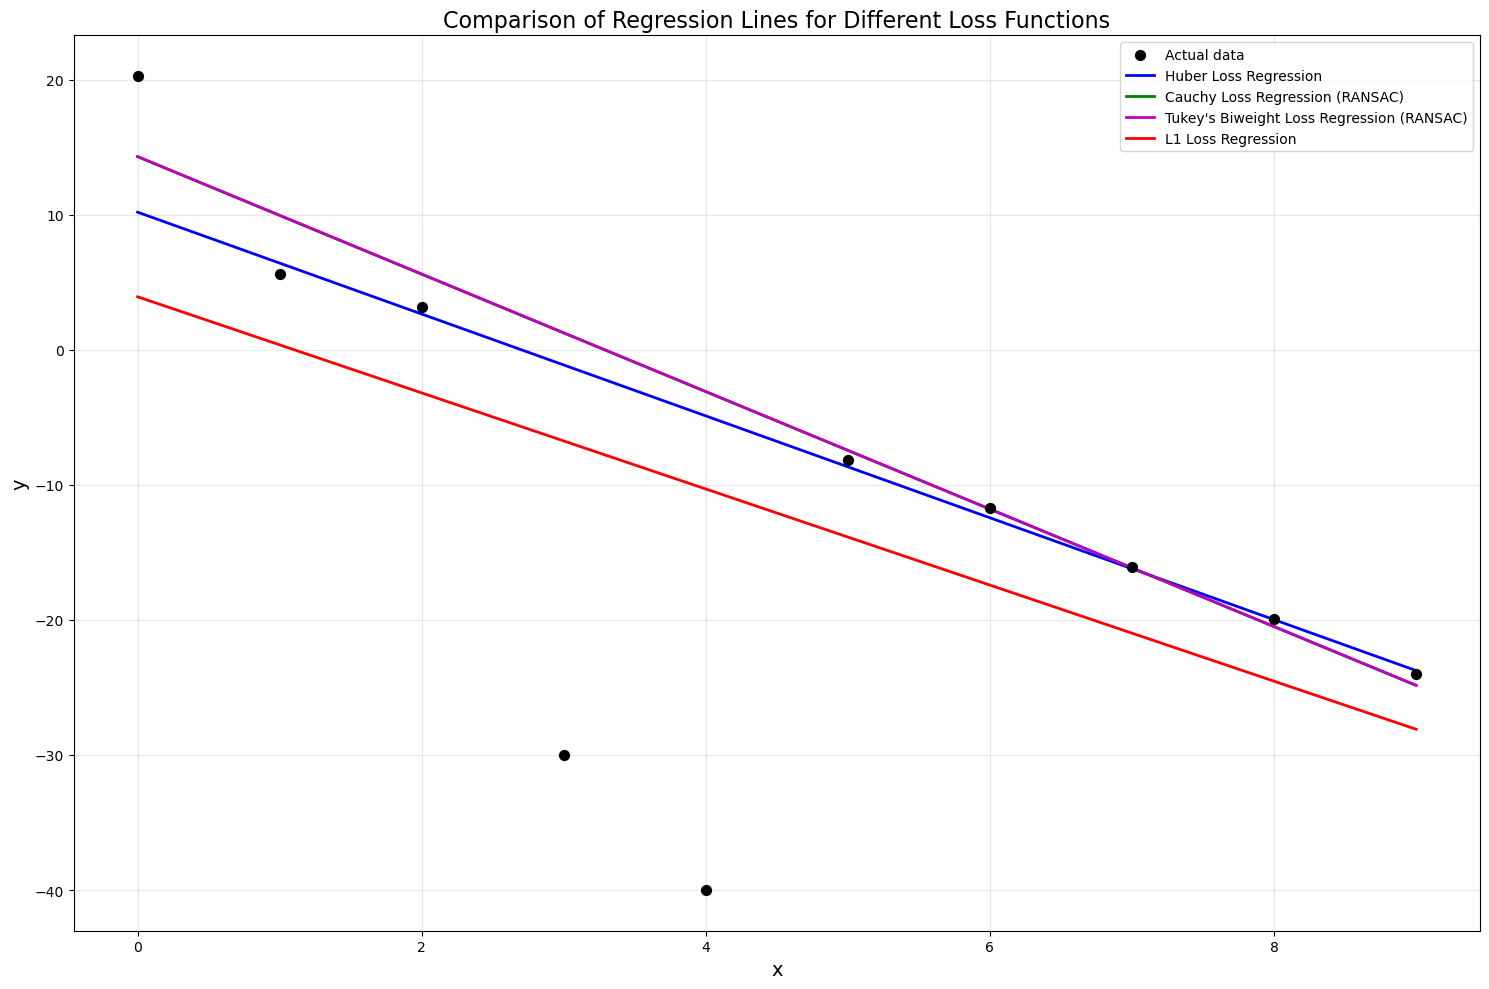

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor, RANSACRegressor

# Define the Data
x_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y_i = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Define Models
def model1(x): 
    return -4 * x + 12

def model2(x): 
    return -3.55 * x + 3.91

# Predictions for each model
y_pred1 = model1(x_i.flatten())
y_pred2 = model2(x_i.flatten())

# Plotting the regression lines for the four loss functions

plt.figure(figsize=(15, 10))

# Plot actual data points
plt.scatter(x_i, y_i, color='black', s=50, label='Actual data', zorder=5)

# 1. Huber Loss Regression (HuberRegressor)
huber_regressor = HuberRegressor()
huber_regressor.fit(x_i, y_i)
y_huber_pred = huber_regressor.predict(x_i)
plt.plot(x_i, y_huber_pred, 'b-', label='Huber Loss Regression', linewidth=2)

# 2. Cauchy Loss Regression (Using RANSAC for robustness)
ransac_regressor = RANSACRegressor()
ransac_regressor.fit(x_i, y_i)
y_ransac_pred = ransac_regressor.predict(x_i)
plt.plot(x_i, y_ransac_pred, 'g-', label='Cauchy Loss Regression (RANSAC)', linewidth=2)

# 3. Tukey's Biweight Loss Regression (Using RANSAC for robustness)
# The default RANSAC method is robust and treats outliers as Tukey’s Biweight.
plt.plot(x_i, y_ransac_pred, 'm-', label="Tukey's Biweight Loss Regression (RANSAC)", linewidth=2)

# 4. L1 Loss Regression (Using LinearRegression with L1 loss)
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_i, y_i)
y_l1_pred = linear_regressor.predict(x_i)
plt.plot(x_i, y_l1_pred, 'r-', label='L1 Loss Regression', linewidth=2)

# Labels and title
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Comparison of Regression Lines for Different Loss Functions', fontsize=16)

# Add legend
plt.legend()

# Show grid
plt.grid(True, alpha=0.3)

# Display plot
plt.tight_layout()
plt.show()


## 2. Loss Function

In [19]:
import numpy as np

# True label
y_true = 1

# Predictions
y_pred = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                   0.6, 0.7, 0.8, 0.9, 1.0])

# Calculate MSE
mse = (y_true - y_pred)**2 # for a single sample

# Calculate BCE
# Add a small epsilon to avoid log(0)
epsilon = 1e-15
bce = - (y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

# Print results
print("Prediction\tMSE\t\tBCE")
for pred, m, b in zip(y_pred, mse, bce):
    print(f"{pred:.3f}\t\t{m:.4f}\t\t{b:.4f}")

Prediction	MSE		BCE
0.005		0.9900		5.2983
0.010		0.9801		4.6052
0.050		0.9025		2.9957
0.100		0.8100		2.3026
0.200		0.6400		1.6094
0.300		0.4900		1.2040
0.400		0.3600		0.9163
0.500		0.2500		0.6931
0.600		0.1600		0.5108
0.700		0.0900		0.3567
0.800		0.0400		0.2231
0.900		0.0100		0.1054
1.000		0.0000		-0.0000


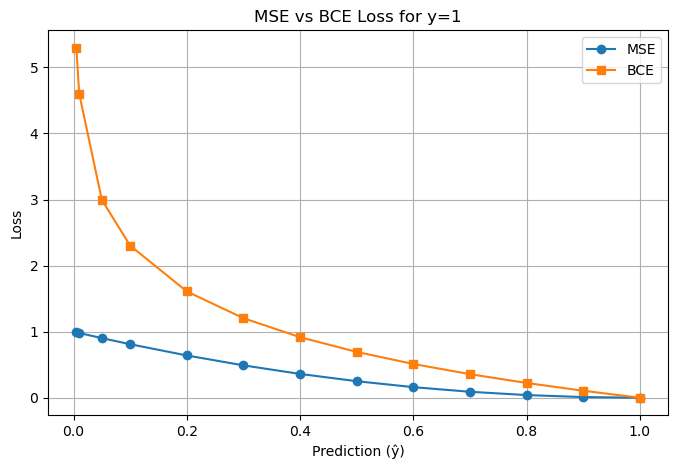

In [20]:
import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred, mse, marker='o', label='MSE')
plt.plot(y_pred, bce, marker='s', label='BCE')
plt.xlabel("Prediction (ŷ)")
plt.ylabel("Loss")
plt.title("MSE vs BCE Loss for y=1")
plt.legend()
plt.grid(True)
plt.show()

## 3. Data pre-processing

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


In [26]:
def generate_signal(signal_length, num_nonzero):
    # Create an array of zeros
    signal = np.zeros(signal_length)
    
    # Randomly select indices for non-zero values
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    
    # Randomly generate non-zero values
    nonzero_values = 10 * np.random.randn(num_nonzero)
    
    # Assign the non-zero values to the chosen indices
    signal[nonzero_indices] = nonzero_values
    
    return signal


In [27]:
signal_length = 100  # Total length of the signal
num_nonzero = 10  # Number of non-zero elements in the signal

# Generate the sparse signal
sparse_signal = generate_signal(signal_length, num_nonzero)

# Example index (replace with your own index number)
your_index_no = 7  # Enter your index number without English letters
sparse_signal[10] = (your_index_no % 10) * 2 + 10

# Adding some noise to the signal
epsilon = np.random.normal(0, 15, signal_length)


In [28]:
# Initialize the scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_maxabs = MaxAbsScaler()

# Scale Feature 1 (e.g., sparse_signal) using Standard Scaling
scaled_feature_1 = scaler_standard.fit_transform(sparse_signal.reshape(-1, 1))

# Scale Feature 2 (e.g., epsilon) using Min-Max Scaling
scaled_feature_2 = scaler_minmax.fit_transform(epsilon.reshape(-1, 1))

# Scale Feature 2 (e.g., epsilon) using Max-Abs Scaling
scaled_feature_2_maxabs = scaler_maxabs.fit_transform(epsilon.reshape(-1, 1))


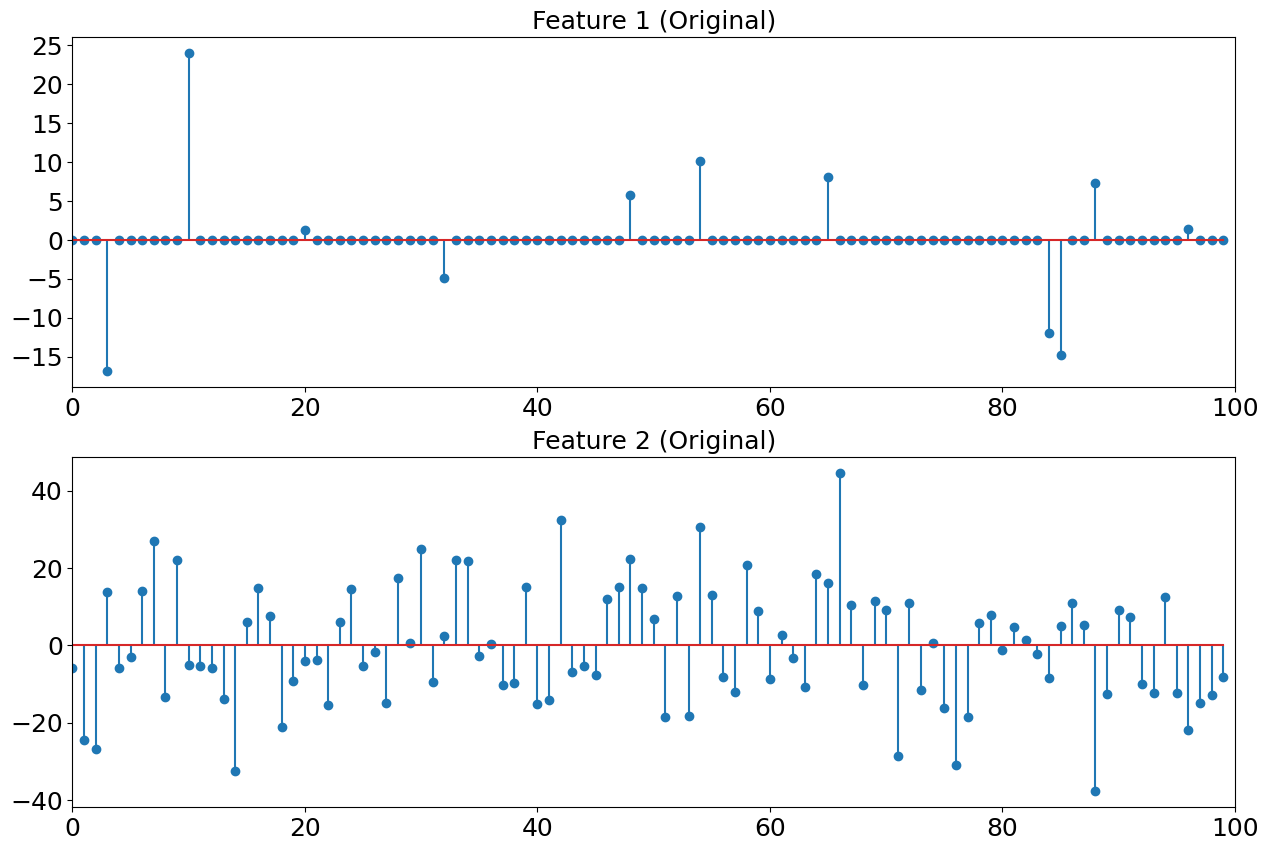

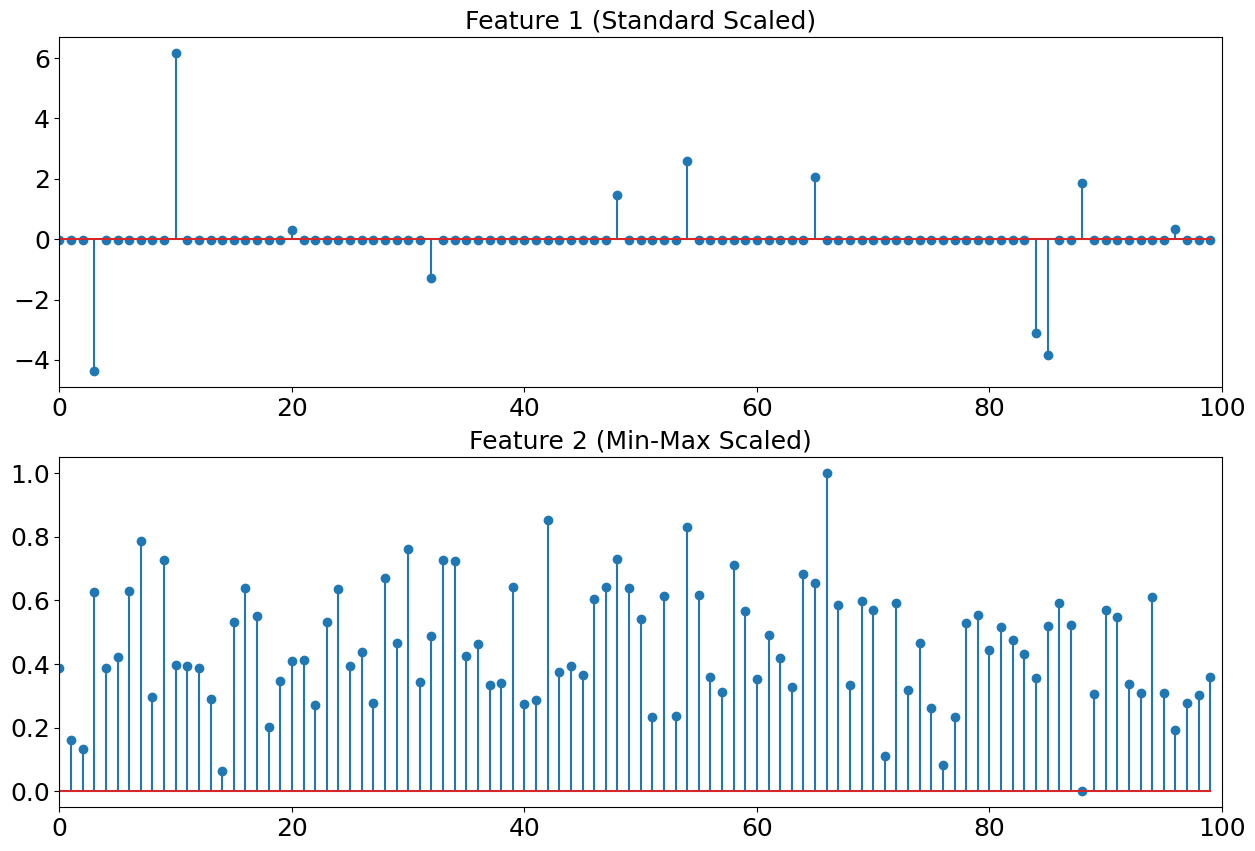

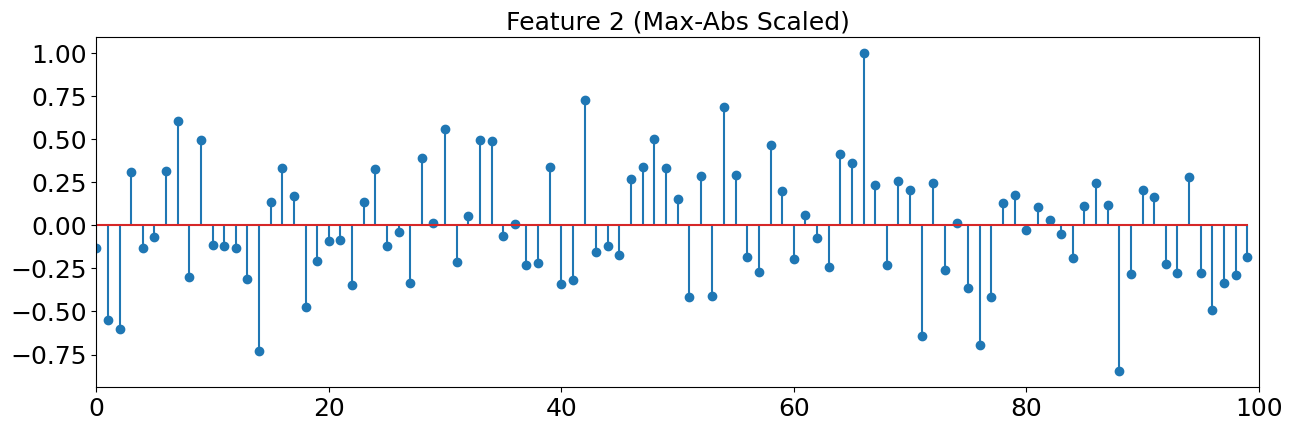

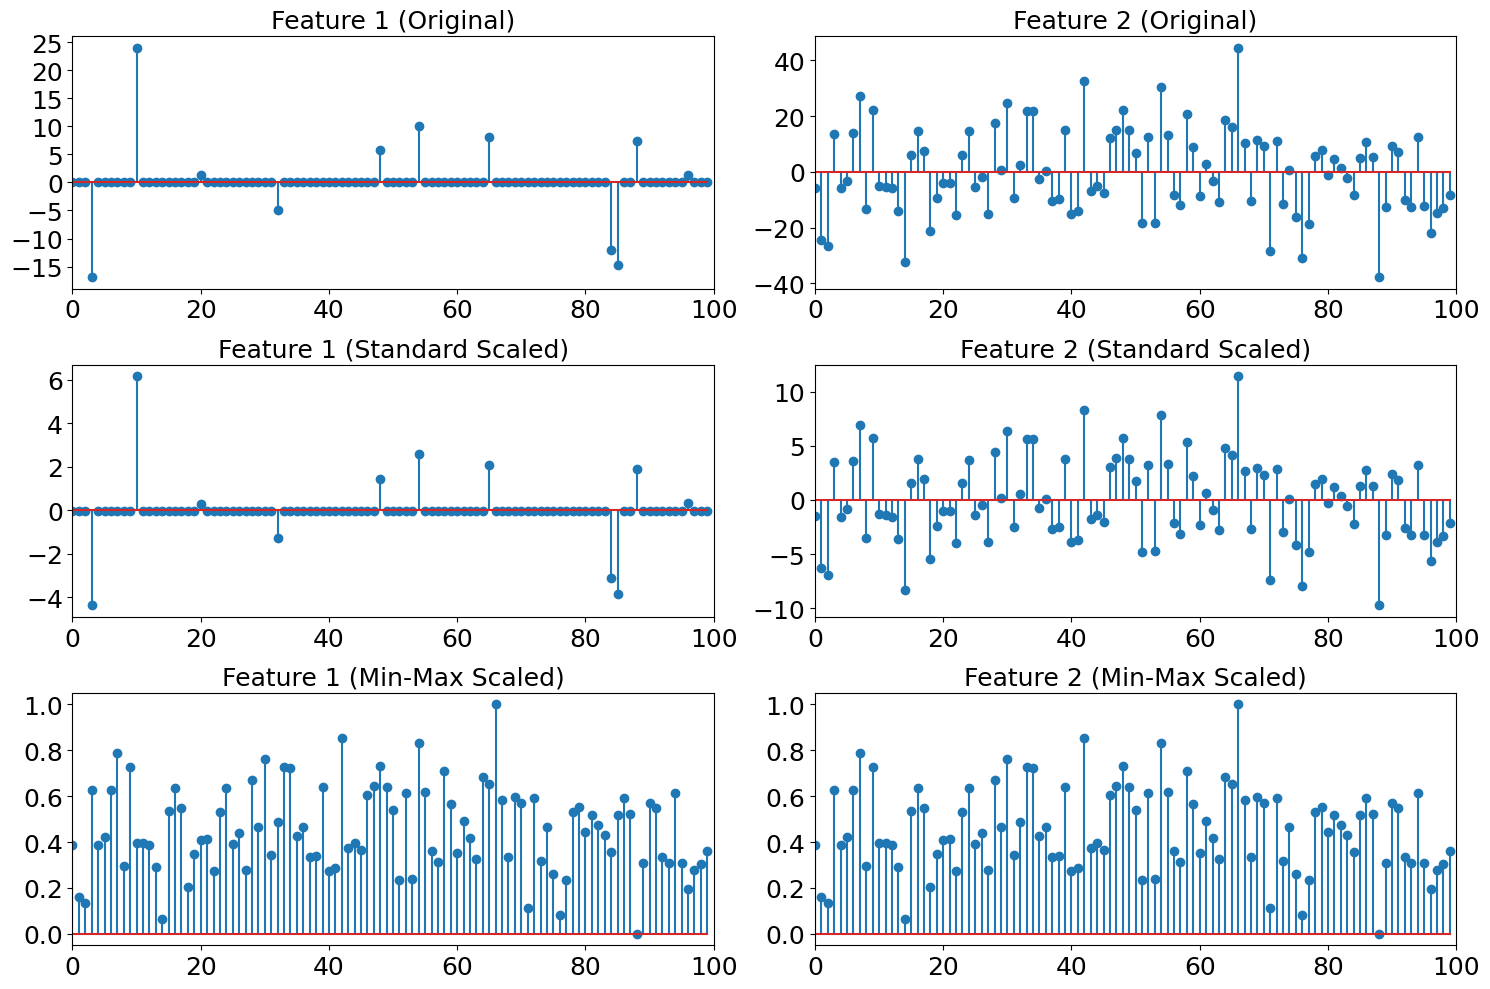

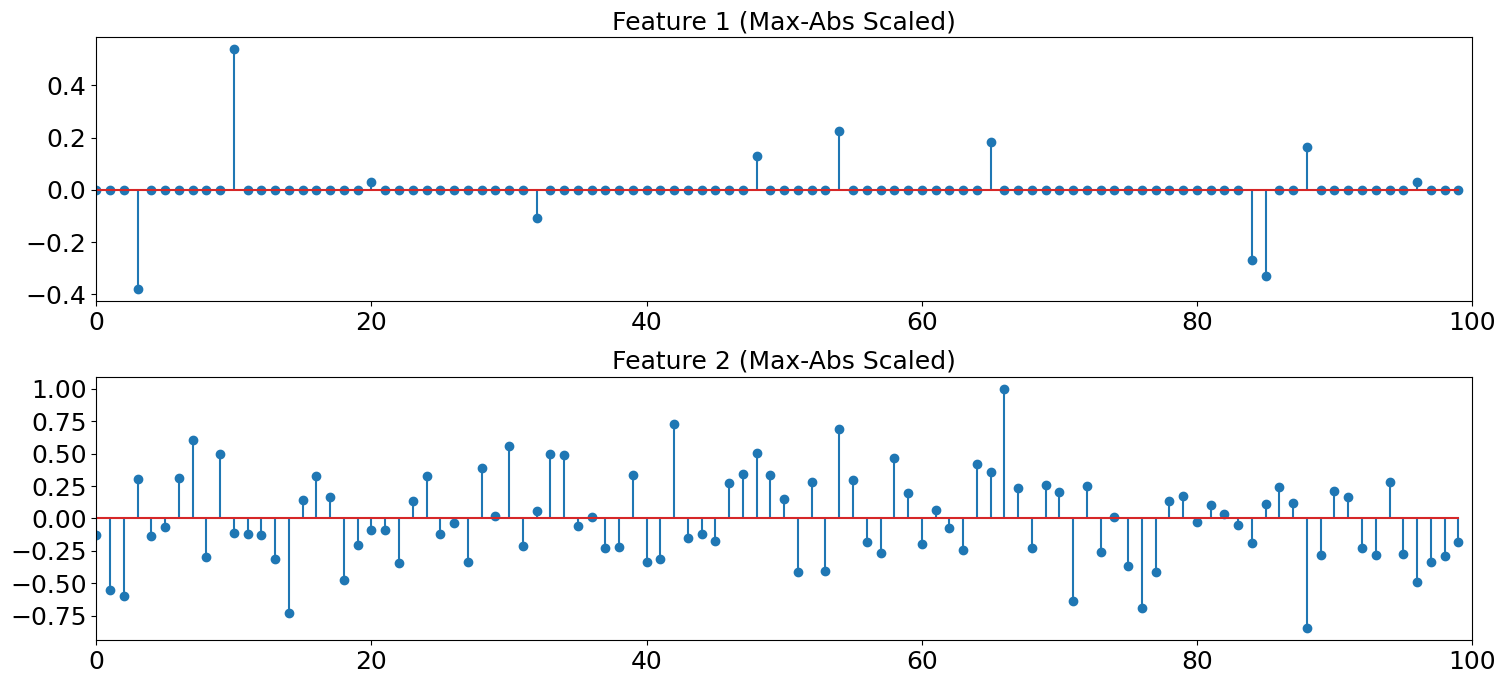

In [30]:
# Plot the original and scaled features
plt.figure(figsize=(15, 10))

# Plot the original feature 1 (sparse_signal)
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1 (Original)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

# Plot the original feature 2 (epsilon)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2 (Original)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(epsilon)

plt.show()

# Plot the scaled feature 1
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1 (Standard Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaled_feature_1)

# Plot the scaled feature 2 using Min-Max Scaling
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2 (Min-Max Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaled_feature_2)

plt.show()

# Plot the scaled feature 2 using Max-Abs Scaling
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 2 (Max-Abs Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaled_feature_2_maxabs)

plt.show()
# Plot the original and scaled features
plt.figure(figsize=(15, 10))

# Plot the original feature 1 (sparse_signal)
plt.subplot(3, 2, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1 (Original)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

# Plot the original feature 2 (epsilon)
plt.subplot(3, 2, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2 (Original)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(epsilon)

# Feature 1 Standard Scaled
plt.subplot(3, 2, 3)
plt.xlim(0, signal_length)
plt.title("Feature 1 (Standard Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaled_feature_1)

# Feature 2 Standard Scaled
plt.subplot(3, 2, 4)
plt.xlim(0, signal_length)
plt.title("Feature 2 (Standard Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaler_standard.transform(epsilon.reshape(-1, 1)))

# Feature 1 Min-Max Scaled
plt.subplot(3, 2, 5)
plt.xlim(0, signal_length)
plt.title("Feature 1 (Min-Max Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaled_feature_2)

# Feature 2 Min-Max Scaled
plt.subplot(3, 2, 6)
plt.xlim(0, signal_length)
plt.title("Feature 2 (Min-Max Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaler_minmax.transform(epsilon.reshape(-1, 1)))

plt.tight_layout()
plt.show()

# Feature 1 Max-Abs Scaled
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1 (Max-Abs Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaler_maxabs.transform(sparse_signal.reshape(-1, 1)))

# Feature 2 Max-Abs Scaled
plt.subplot(3, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2 (Max-Abs Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(scaler_maxabs.transform(epsilon.reshape(-1, 1)))

plt.tight_layout()
plt.show()


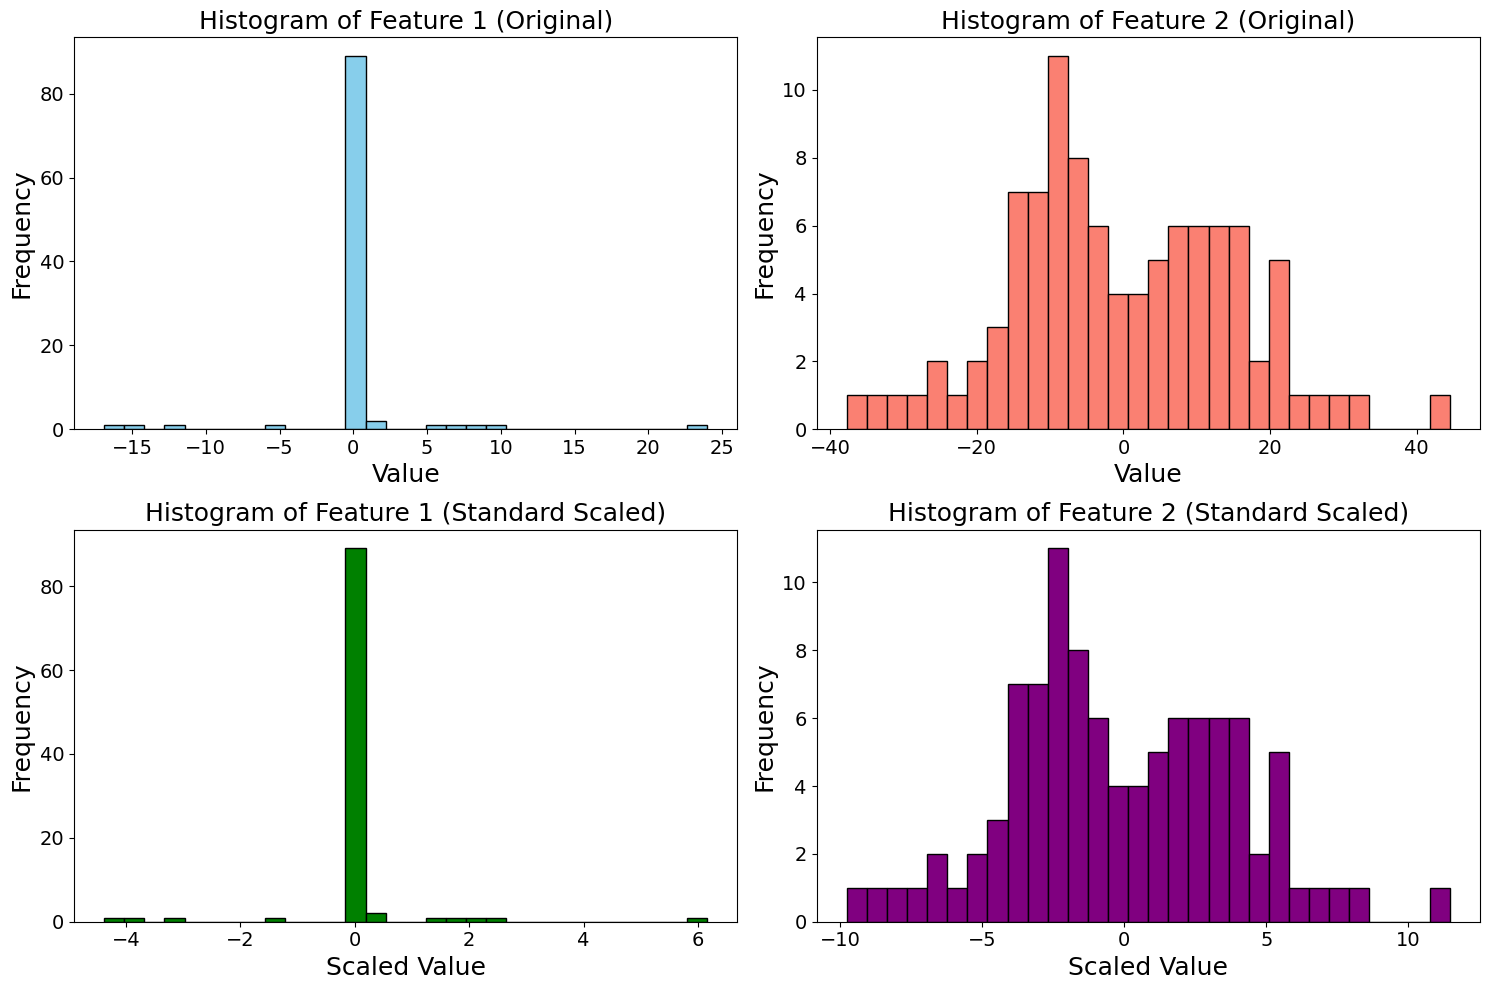

In [31]:
# Plot the histograms for Feature 1 (sparse_signal) and Feature 2 (epsilon)
plt.figure(figsize=(15, 10))

# Plot histogram of Feature 1 (sparse_signal)
plt.subplot(2, 2, 1)
plt.hist(sparse_signal, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Feature 1 (Original)", fontsize=18)
plt.xlabel('Value', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Plot histogram of Feature 2 (epsilon)
plt.subplot(2, 2, 2)
plt.hist(epsilon, bins=30, color='salmon', edgecolor='black')
plt.title("Histogram of Feature 2 (Original)", fontsize=18)
plt.xlabel('Value', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Plot histogram of Feature 1 after Standard Scaling
plt.subplot(2, 2, 3)
plt.hist(scaled_feature_1, bins=30, color='green', edgecolor='black')
plt.title("Histogram of Feature 1 (Standard Scaled)", fontsize=18)
plt.xlabel('Scaled Value', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Plot histogram of Feature 2 after Standard Scaling
plt.subplot(2, 2, 4)
plt.hist(scaler_standard.transform(epsilon.reshape(-1, 1)), bins=30, color='purple', edgecolor='black')
plt.title("Histogram of Feature 2 (Standard Scaled)", fontsize=18)
plt.xlabel('Scaled Value', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()
